In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## adult.csv

In [4]:
dfadult = pd.read_csv('/Users/jaseng/Documents/summer24_patina_project/patinaproject1/adult.csv')
dfadult.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
dfadult.shape
#dfadult.info

(32561, 15)

In [6]:
dfadult[dfadult == '?'] = np.nan

In [7]:
# dfadult.info

In [8]:
dfadult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
for col in ['workclass', 'occupation', 'native.country']:
    dfadult[col].fillna(dfadult[col].mode()[0], inplace=True)
    
dfadult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
dfadult.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90   Private   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66   Private  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [11]:
X = dfadult.drop(['income'], axis=1)

y = dfadult['income']

In [12]:
X.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2     Prof-specialty      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country  
0          4356              40  United-States  
1          4356              18  United-States  
2          4356              40  United-States  
3          3900              40  United-States  
4          3900              40  United-States

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [15]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [16]:
X_train.head()

age  workclass    fnlwgt  education  education.num  marital.status  \
0  0.101484   2.600478 -1.494279  -0.332263       1.133894       -0.402341   
1  0.028248  -1.884720  0.438778   0.184396      -0.423425       -0.402341   
2  0.247956  -0.090641  0.045292   1.217715      -0.034095        0.926666   
3 -0.850587  -1.884720  0.793152   0.184396      -0.423425        0.926666   
4 -0.044989  -2.781760 -0.853275   0.442726       1.523223       -0.402341   

   occupation  relationship     race       sex  capital.gain  capital.loss  \
0   -0.782234      2.214196  0.39298 -1.430470     -0.145189     -0.217407   
1   -0.026696     -0.899410  0.39298  0.699071     -0.145189     -0.217407   
2   -0.782234     -0.276689  0.39298 -1.430470     -0.145189     -0.217407   
3   -0.530388      0.968753  0.39298  0.699071     -0.145189     -0.217407   
4   -0.782234     -0.899410  0.39298  0.699071     -0.145189     -0.217407   

   hours.per.week  native.country  
0       -1.662414        0.262317  
1       -0.200753        0.262317  
2       -0.038346        0.262317  
3       -0.038346        0.262317  
4       -0.038346        0.262317

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8217


In [18]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

In [19]:
X = dfadult.drop(['income','native.country'], axis=1)
y = dfadult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8213


### Trying different pca approach

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from itertools import combinations
import pandas as pd
from sklearn.decomposition import PCA

In [21]:
X = dfadult.drop(['income'], axis=1)
# drop the column we want to predict
y = dfadult['income']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# split model into training and testing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
        
        
scaler = StandardScaler()
# scale features before applying PCA --> (mean = 0, variance = 1)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [23]:
pca = PCA(n_components= 14)
pca = PCA(.90) 
# chooses minimum number of principal components such that x% of variance is retained
pca.fit(X_train)
pca.n_components_

12

In [24]:
# Get the indices of the selected components
selected_components = pca.components_

# Accumulate unique column names of selected components
selected_columns = set()
for component in selected_components:
    component_indices = component.argsort()[::-1][:1]  # Get the index of the most important feature
    component_names = list(X_train.columns[component_indices])
    selected_columns.update(component_names)

# Print the column names of the selected components as a list
print("Column names of selected components:")
print(list(selected_columns))

Column names of selected components:
['occupation', 'capital.gain', 'marital.status', 'fnlwgt', 'sex', 'hours.per.week', 'race', 'age', 'native.country']


In [25]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

In [26]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
# default solver is slow so use lbfgs
logisticRegr.fit(train_img, y_train)

LogisticRegression()

In [27]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['<=50K'], dtype=object)

In [28]:
logisticRegr.score(test_img, y_test)

0.8208619101238612

In [29]:
pca = PCA(n_components= 14)
pca = PCA(.85) 
# chooses minimum number of principal components such that x% of variance is retained
pca.fit(X_train)
pca.n_components_

11

In [30]:
# Get the indices of the selected components
selected_components = pca.components_

# Accumulate unique column names of selected components
selected_columns = set()
for component in selected_components:
    component_indices = component.argsort()[::-1][:1]  # Get the index of the most important feature
    component_names = list(X_train.columns[component_indices])
    selected_columns.update(component_names)

# Print the column names of the selected components as a list
print("Column names of selected components:")
print(list(selected_columns))

Column names of selected components:
['occupation', 'capital.gain', 'fnlwgt', 'sex', 'hours.per.week', 'race', 'age', 'native.country']


In [31]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

logisticRegr = LogisticRegression(solver = 'lbfgs')
# default solver is slow so use lbfgs
logisticRegr.fit(train_img, y_train)

logisticRegr.score(test_img, y_test)

0.8188146176681339

The number of dimensions required to preserve 90% of variance is 12


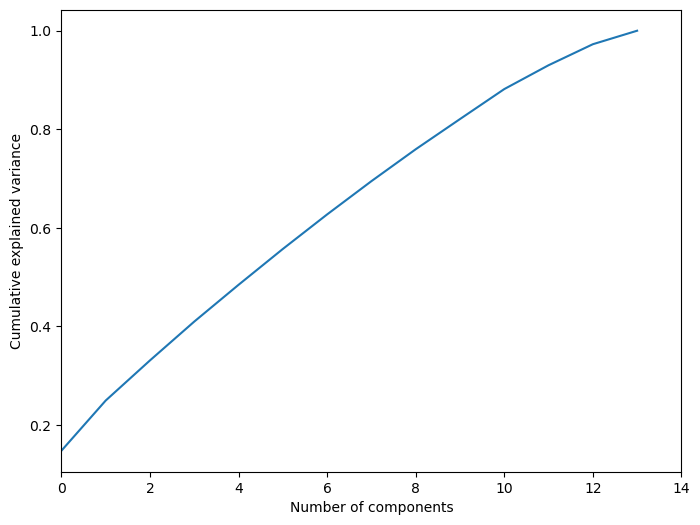

In [32]:
X = dfadult.drop(['income'], axis=1)
y = dfadult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)


plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## county_data.csv

In [33]:
dfcounty = pd.read_csv('/Users/jaseng/Documents/summer24_patina_project/patinaproject1/acs2017_county_data.csv')
dfcounty.head()

CountyId    State          County  TotalPop    Men   Women  Hispanic  \
0      1001  Alabama  Autauga County     55036  26899   28137       2.7   
1      1003  Alabama  Baldwin County    203360  99527  103833       4.4   
2      1005  Alabama  Barbour County     26201  13976   12225       4.2   
3      1007  Alabama     Bibb County     22580  12251   10329       2.4   
4      1009  Alabama   Blount County     57667  28490   29177       9.0   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   75.4   18.9     0.3  ...   0.6          1.3         2.5         25.8   
1   83.1    9.5     0.8  ...   0.8          1.1         5.6         27.0   
2   45.7   47.8     0.2  ...   2.2          1.7         1.3         23.4   
3   74.6   22.0     0.4  ...   0.3          1.7         1.5         30.0   
4   87.4    1.5     0.3  ...   0.4          0.4         2.1         35.0   

   Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0     24112         74.1        20.2           5.6         0.1           5.2  
1     89527         80.7        12.9           6.3         0.1           5.5  
2      8878         74.1        19.1           6.5         0.3          12.4  
3      8171         76.0        17.4           6.3         0.3           8.2  
4     21380         83.9        11.9           4.0         0.1           4.9  

[5 rows x 37 columns]

In [34]:
dfcounty.shape

(3220, 37)

In [35]:
dfcounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          3220 non-null   int64  
 1   State             3220 non-null   object 
 2   County            3220 non-null   object 
 3   TotalPop          3220 non-null   int64  
 4   Men               3220 non-null   int64  
 5   Women             3220 non-null   int64  
 6   Hispanic          3220 non-null   float64
 7   White             3220 non-null   float64
 8   Black             3220 non-null   float64
 9   Native            3220 non-null   float64
 10  Asian             3220 non-null   float64
 11  Pacific           3220 non-null   float64
 12  VotingAgeCitizen  3220 non-null   int64  
 13  Income            3220 non-null   int64  
 14  IncomeErr         3220 non-null   int64  
 15  IncomePerCap      3220 non-null   int64  
 16  IncomePerCapErr   3220 non-null   int64  


In [36]:
dfcounty.isnull().sum()

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [37]:
dfcounty['ChildPoverty'].fillna(dfcounty['ChildPoverty'].mode()[0], inplace=True)

In [38]:
dfcounty.isnull().sum()

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [39]:
X_drops = dfcounty.drop(['CountyId', 'County'], axis=1)

In [40]:
X_drop_nonnumerical = dfcounty.drop(['CountyId', 'County', 'State'], axis=1)

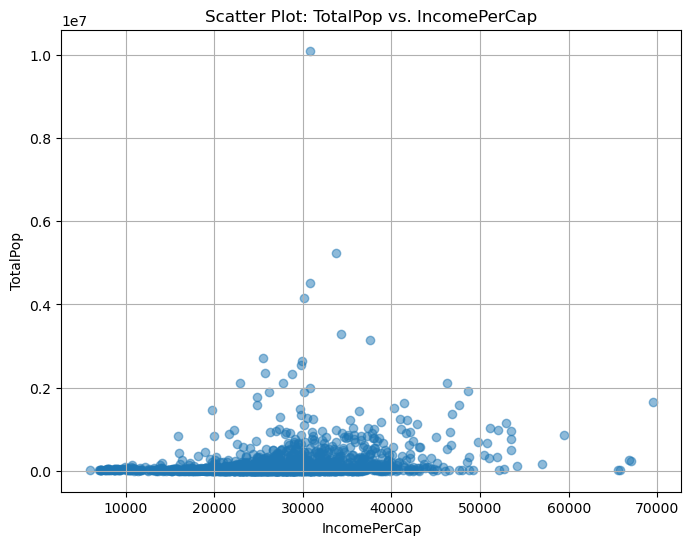

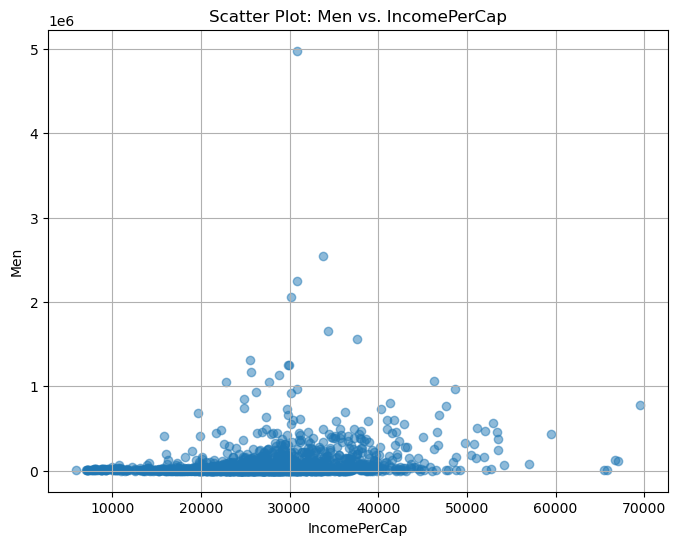

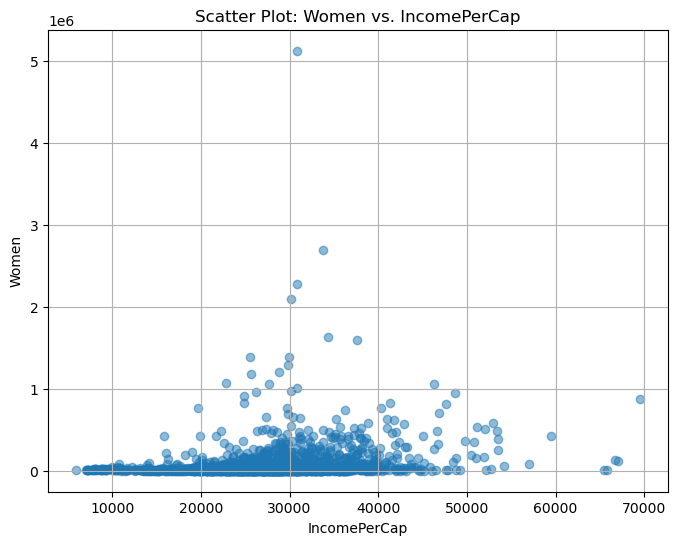

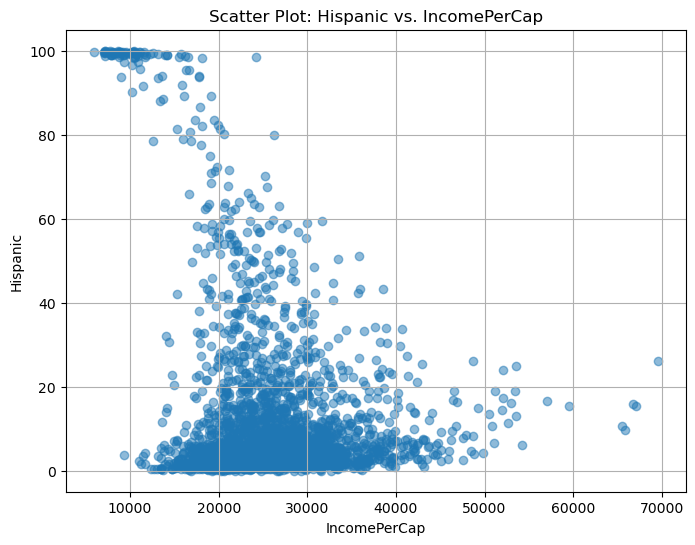

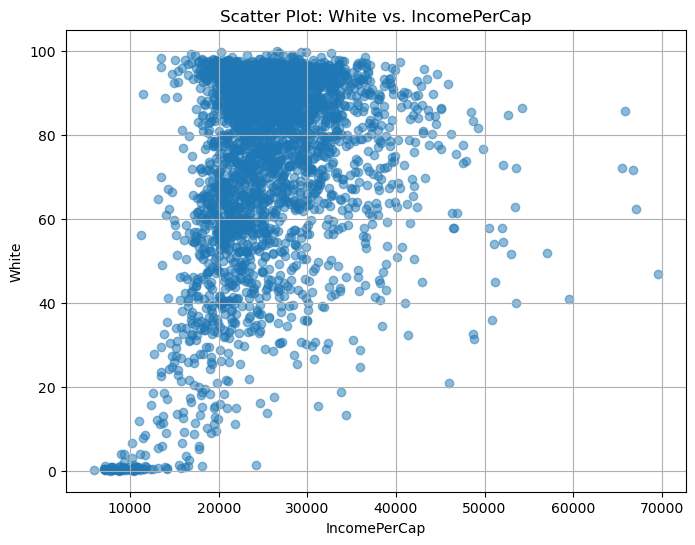

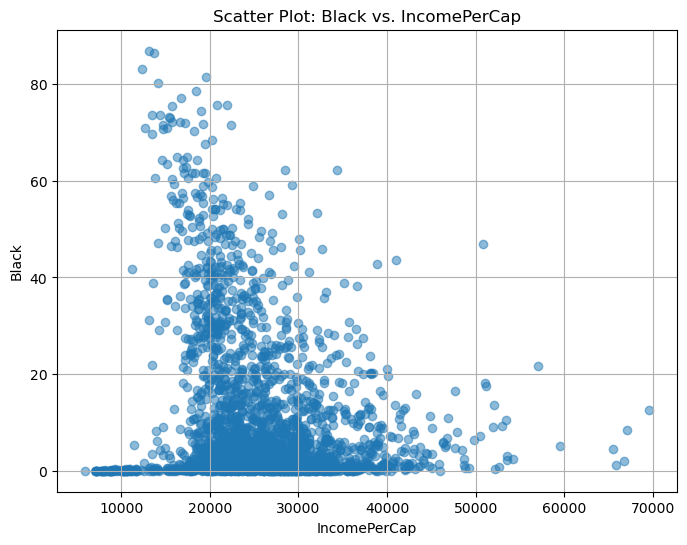

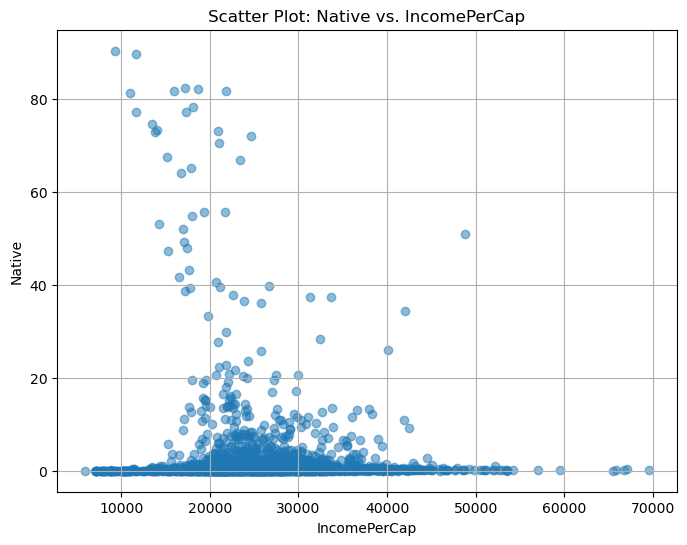

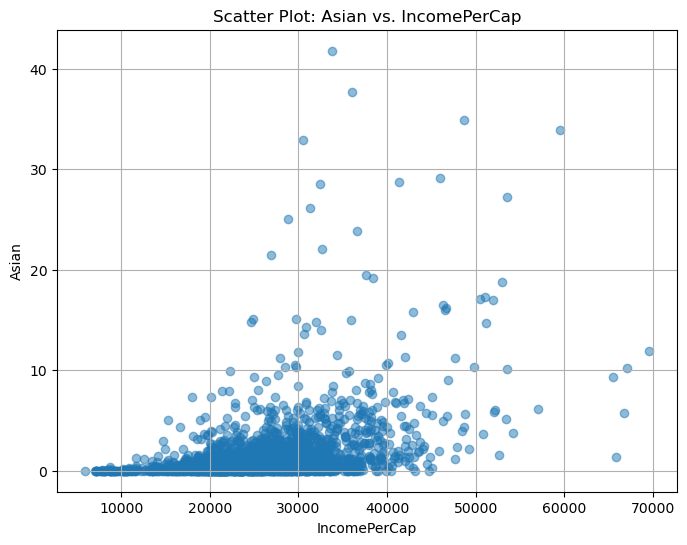

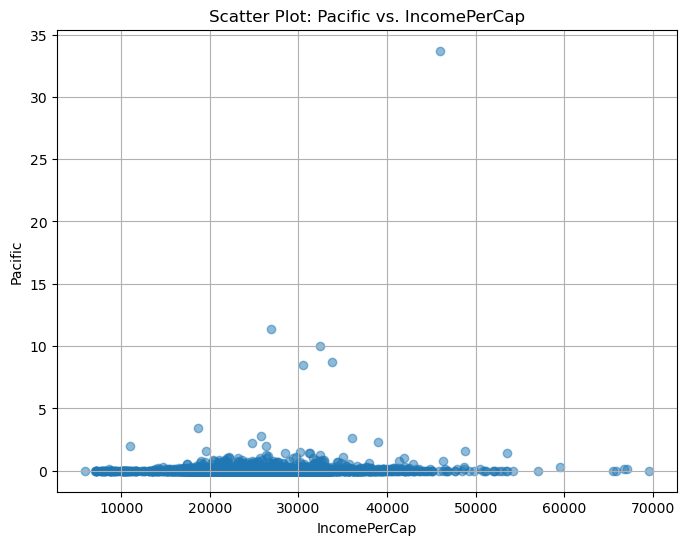

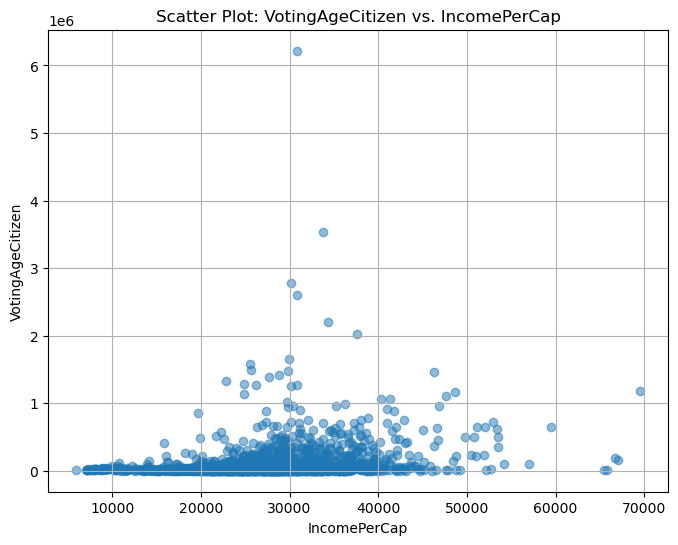

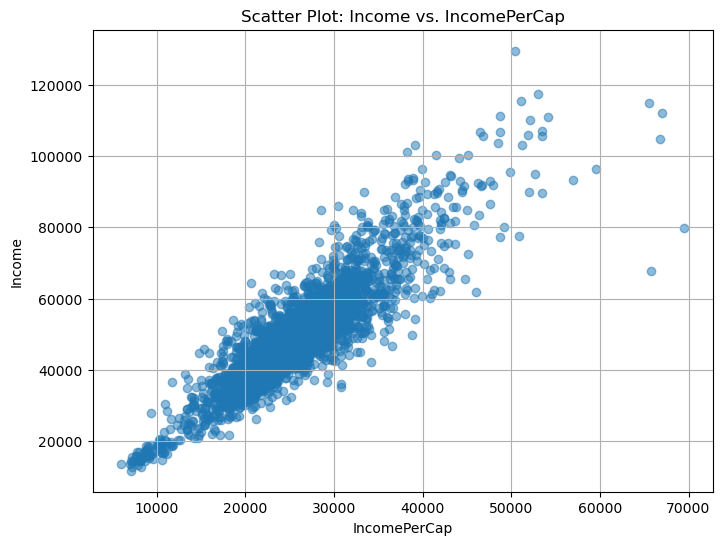

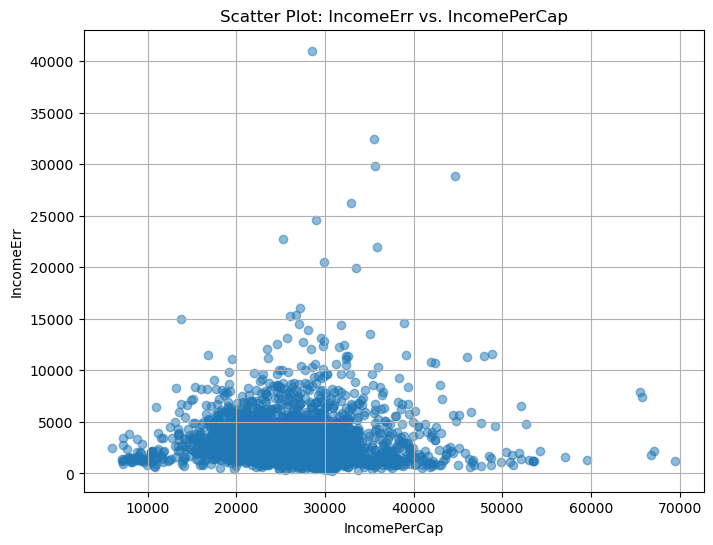

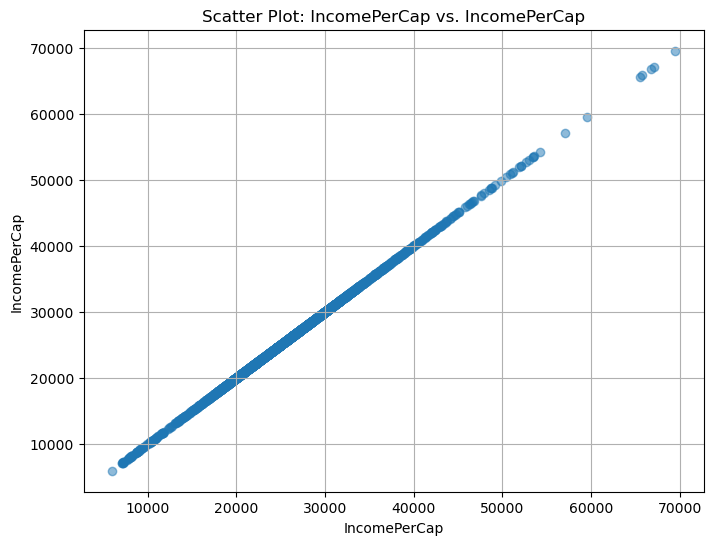

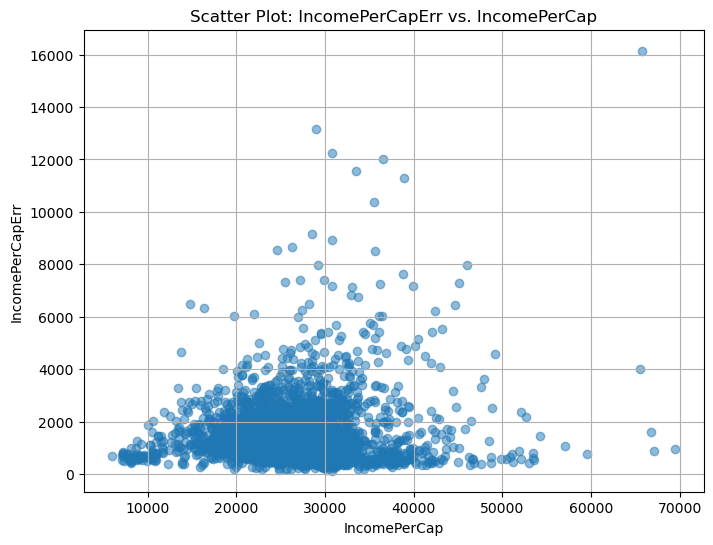

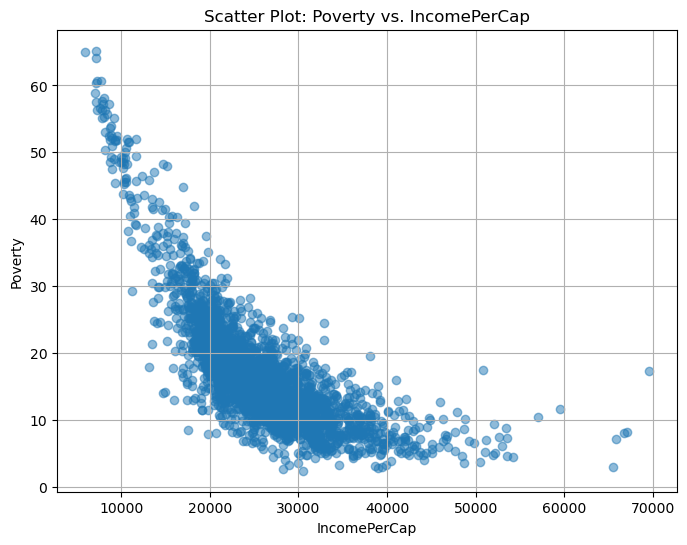

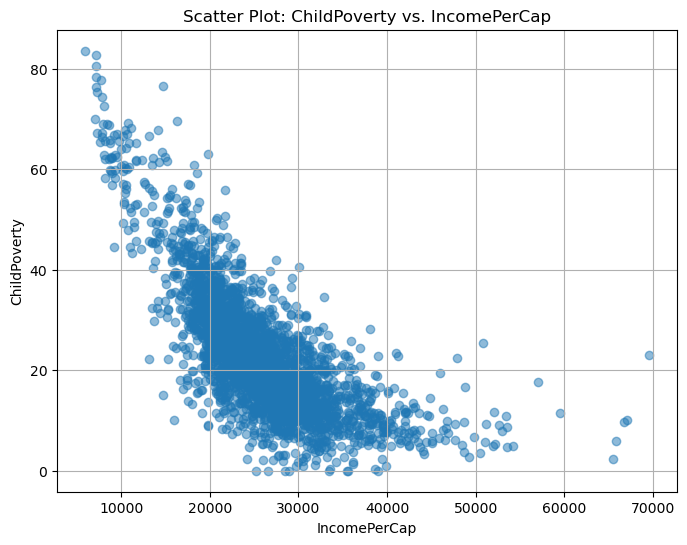

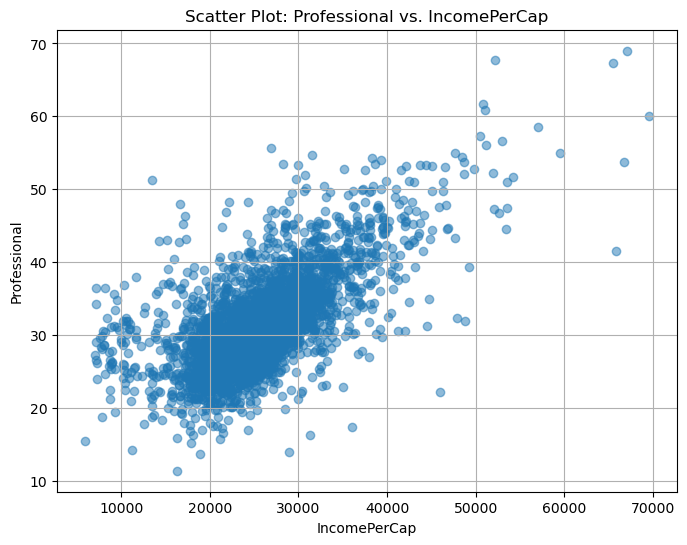

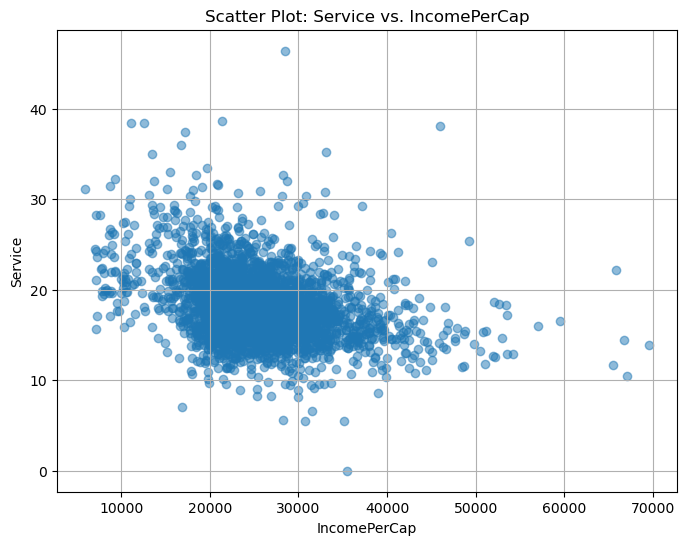

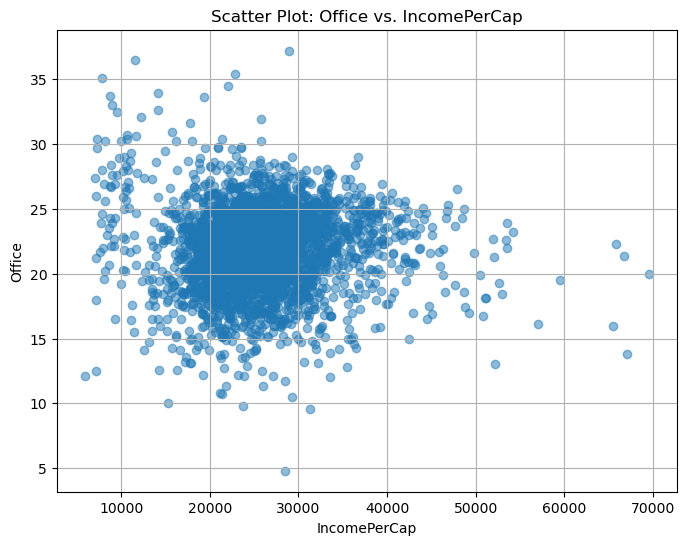

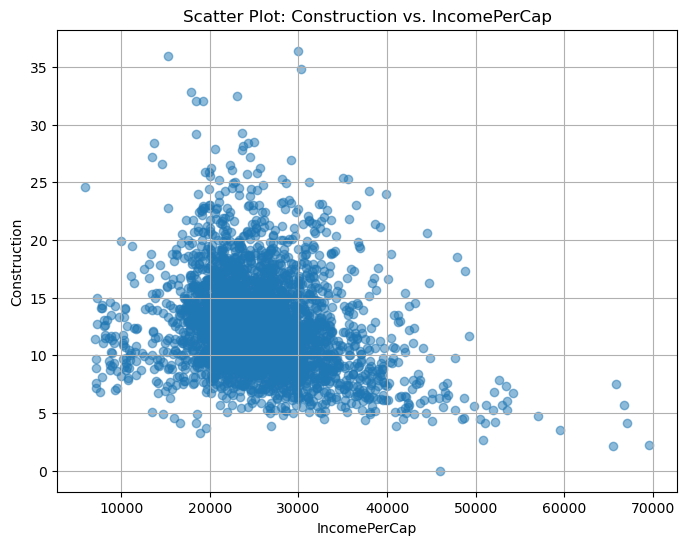

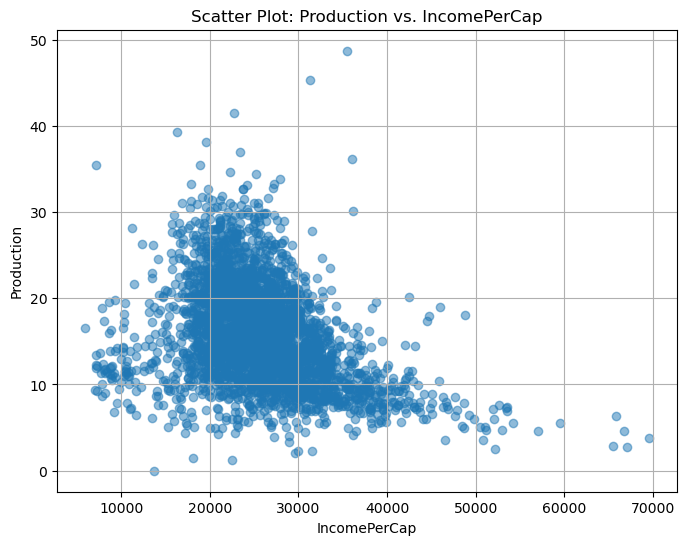

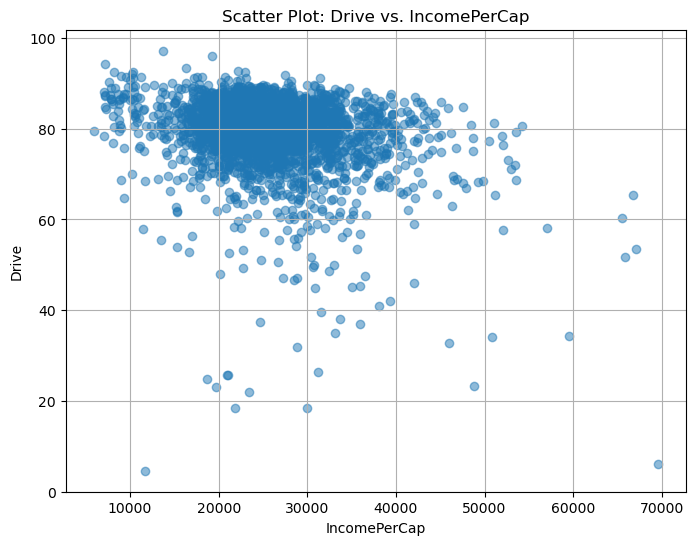

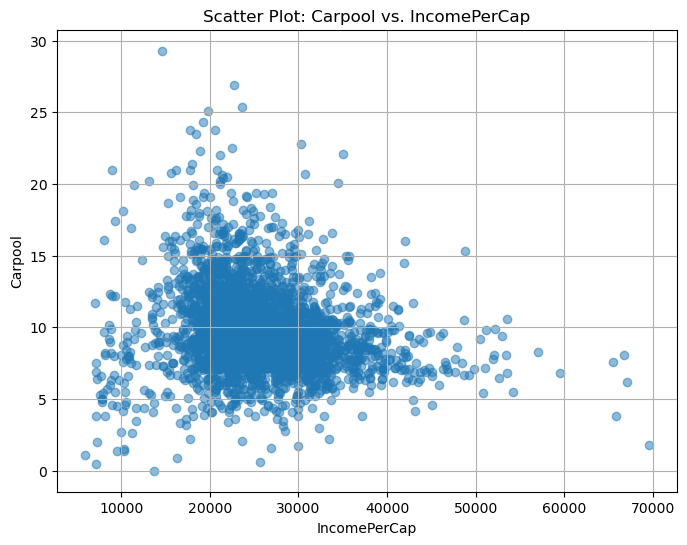

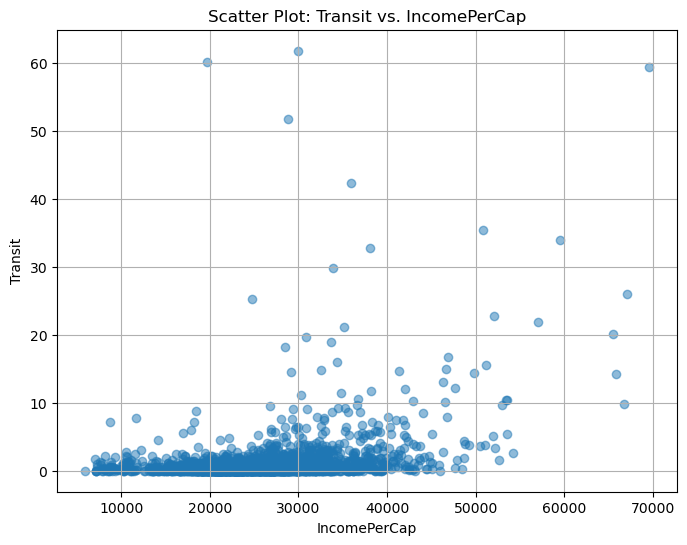

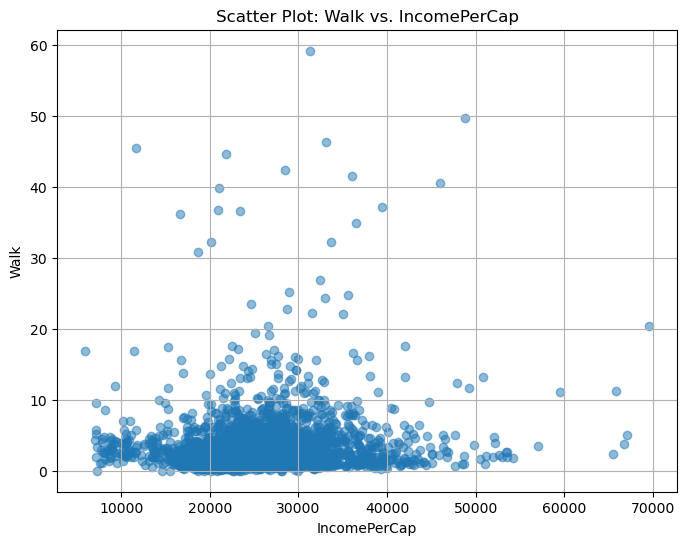

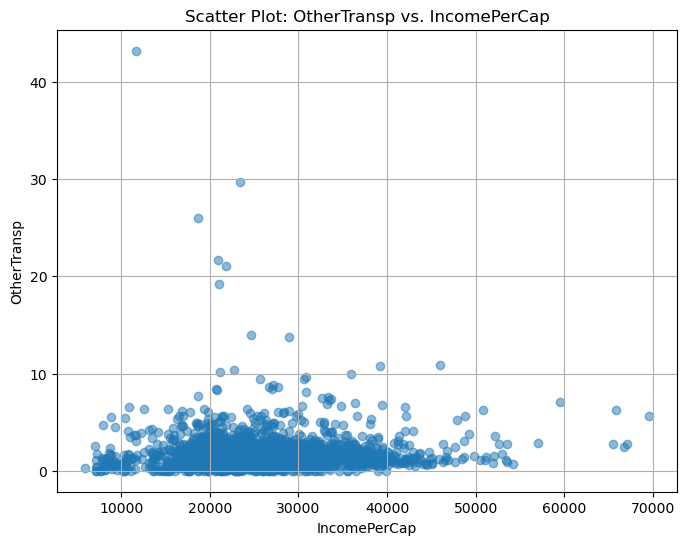

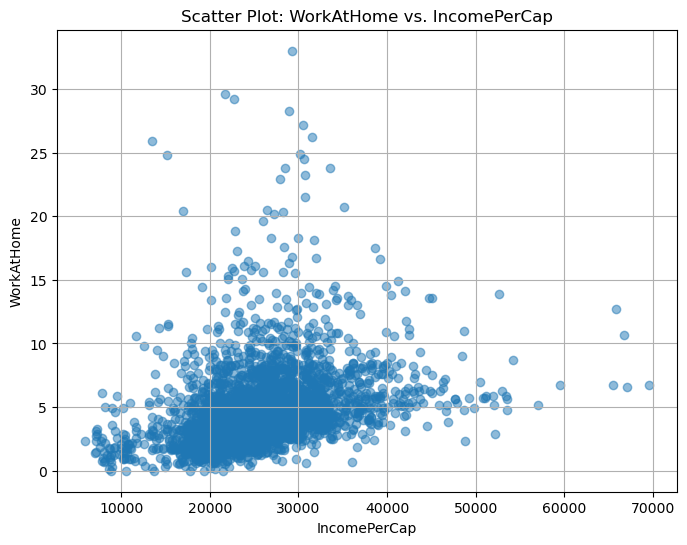

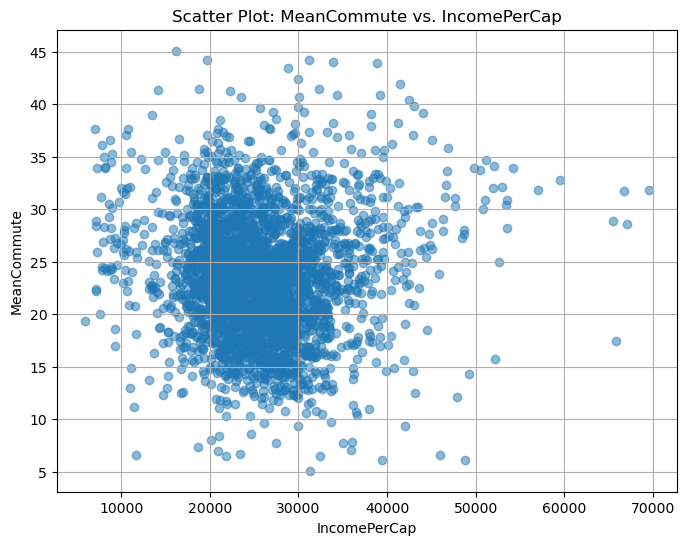

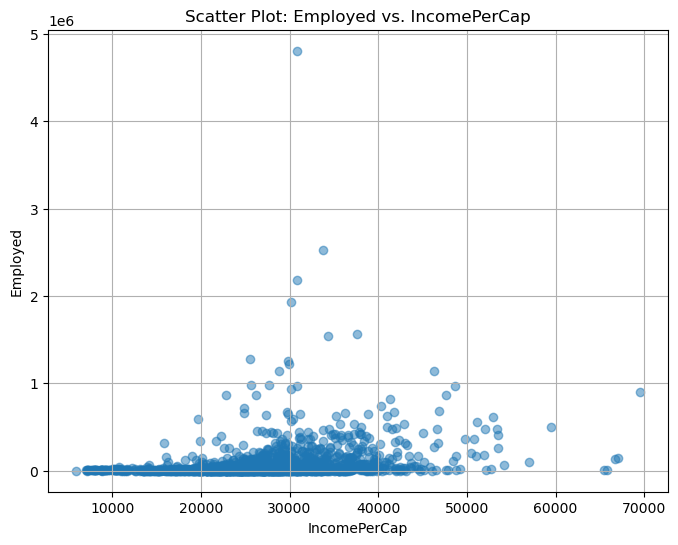

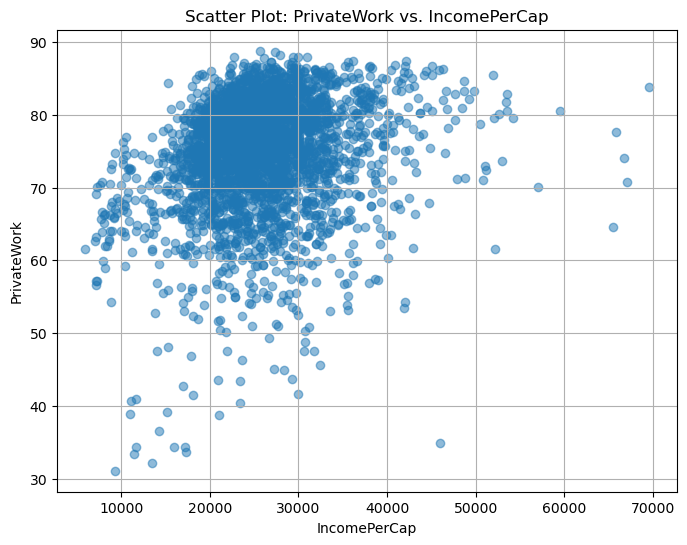

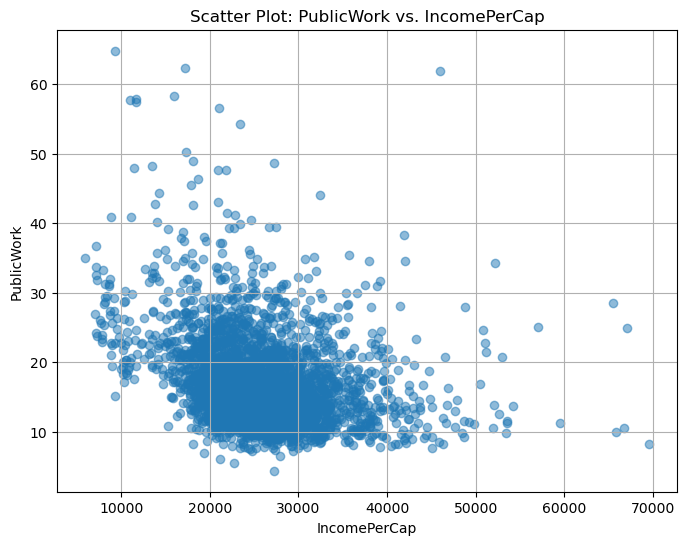

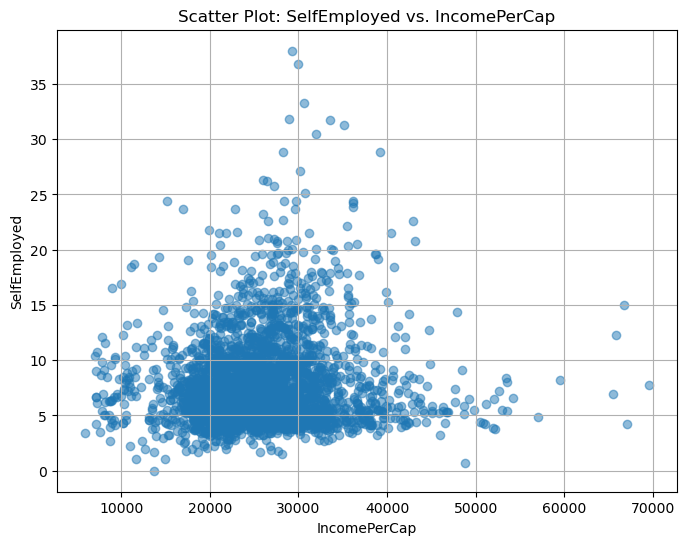

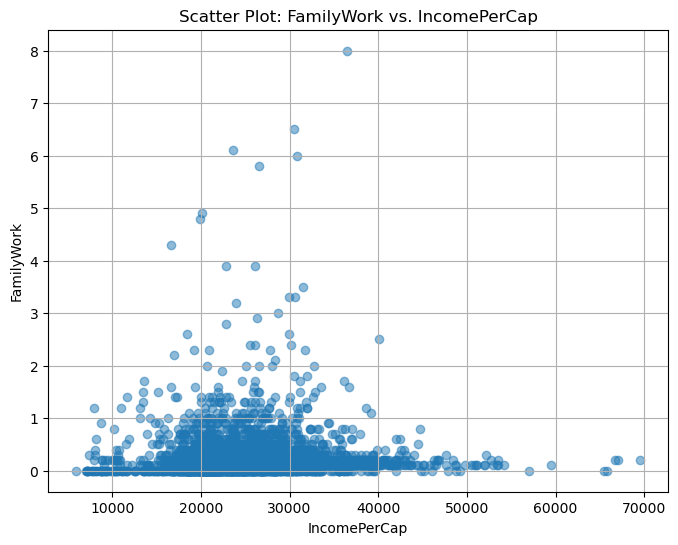

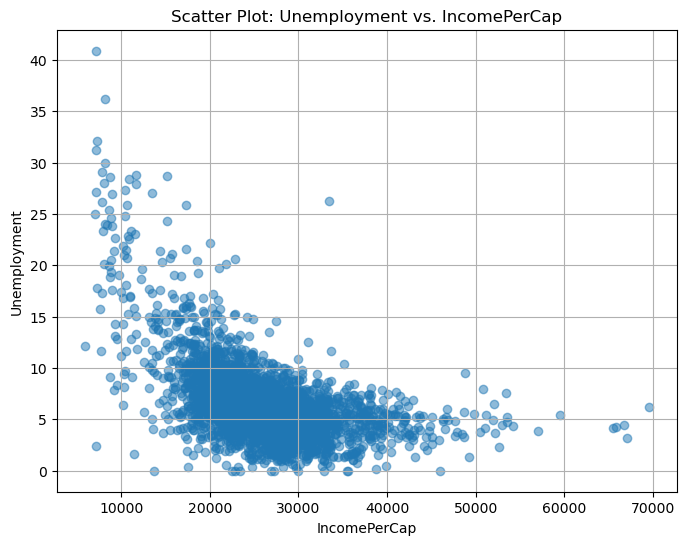

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with the relevant data

# Iterate through each variable (column) in the DataFrame
for column in X_drop_nonnumerical.columns:
    if column != 'variable_of_interest':  # Replace 'variable_of_interest' with the variable you want to plot against others
        plt.figure(figsize=(8, 6))
        plt.scatter(X_drop_nonnumerical['IncomePerCap'], X_drop_nonnumerical[column], alpha=0.5)
        plt.title(f'Scatter Plot: {column} vs. IncomePerCap')
        plt.xlabel('IncomePerCap')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()


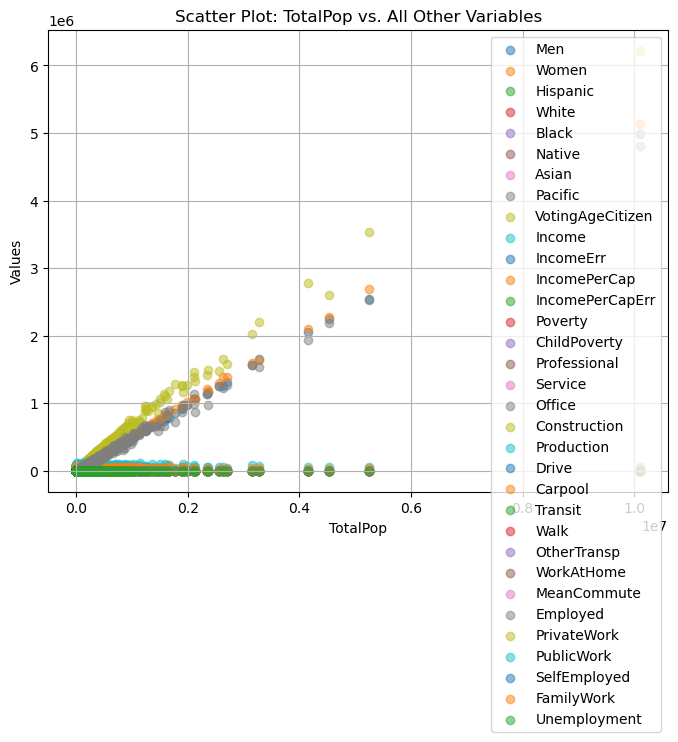

Correlation coefficients for TotalPop:
Men                 0.999879
Women               0.999887
Hispanic            0.115313
White              -0.190120
Black               0.075343
Native             -0.046952
Asian               0.451447
Pacific             0.029164
VotingAgeCitizen    0.996737
Income              0.243317
IncomeErr          -0.237085
IncomePerCap        0.247671
IncomePerCapErr    -0.239664
Poverty            -0.069048
ChildPoverty       -0.063564
Professional        0.255239
Service            -0.004842
Office              0.168049
Construction       -0.264476
Production         -0.186687
Drive              -0.117811
Carpool            -0.066854
Transit             0.401662
Walk               -0.044535
OtherTransp         0.038227
WorkAtHome         -0.008508
MeanCommute         0.158288
Employed            0.997863
PrivateWork         0.196874
PublicWork         -0.145169
SelfEmployed       -0.141051
FamilyWork         -0.079245
Unemployment        0.007856
Name

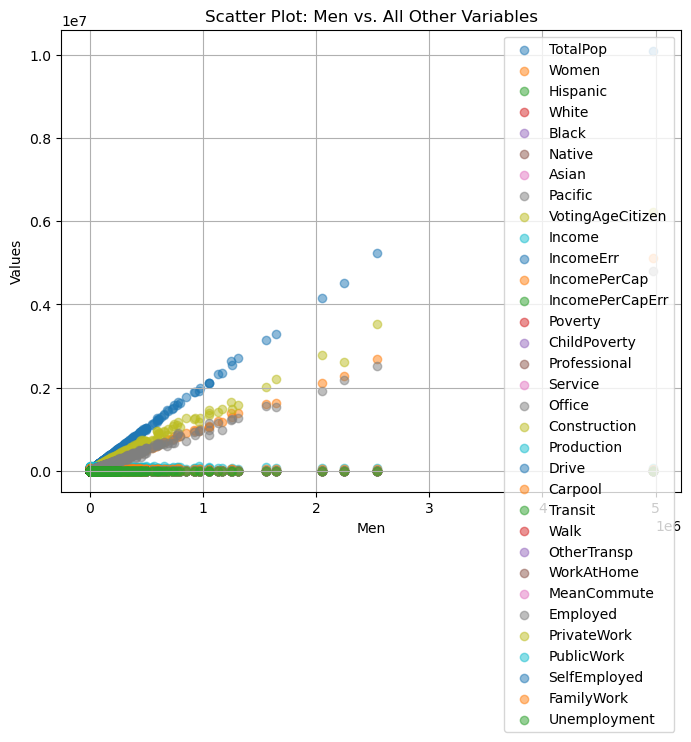

Correlation coefficients for Men:
TotalPop            0.999879
Women               0.999532
Hispanic            0.115690
White              -0.189143
Black               0.072789
Native             -0.046744
Asian               0.452566
Pacific             0.030111
VotingAgeCitizen    0.996225
Income              0.244399
IncomeErr          -0.236575
IncomePerCap        0.247170
IncomePerCapErr    -0.239372
Poverty            -0.070075
ChildPoverty       -0.064806
Professional        0.254020
Service            -0.004812
Office              0.167121
Construction       -0.262624
Production         -0.186153
Drive              -0.116053
Carpool            -0.065380
Transit             0.395659
Walk               -0.044857
OtherTransp         0.038547
WorkAtHome         -0.008084
MeanCommute         0.157212
Employed            0.997744
PrivateWork         0.196004
PublicWork         -0.144308
SelfEmployed       -0.140777
FamilyWork         -0.079039
Unemployment        0.006996
Name: Men

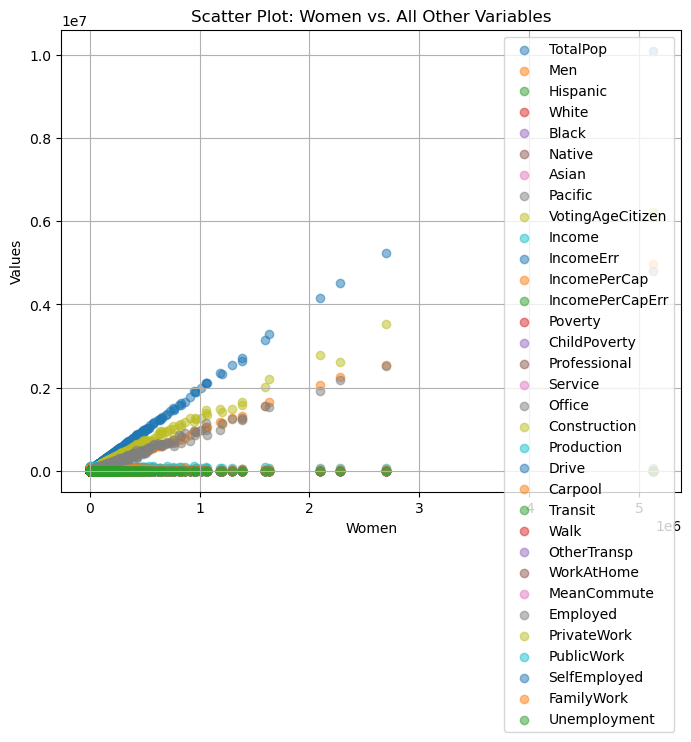

Correlation coefficients for Women:
TotalPop            0.999887
Men                 0.999532
Hispanic            0.114923
White              -0.191019
Black               0.077789
Native             -0.047142
Asian               0.450263
Pacific             0.028243
VotingAgeCitizen    0.997001
Income              0.242217
IncomeErr          -0.237522
IncomePerCap        0.248098
IncomePerCapErr    -0.239890
Poverty            -0.068041
ChildPoverty       -0.062351
Professional        0.256356
Service            -0.004870
Office              0.168905
Construction       -0.266202
Production         -0.187160
Drive              -0.119481
Carpool            -0.068261
Transit             0.407358
Walk               -0.044213
OtherTransp         0.037910
WorkAtHome         -0.008915
MeanCommute         0.159290
Employed            0.997748
PrivateWork         0.197667
PublicWork         -0.145966
SelfEmployed       -0.141282
FamilyWork         -0.079425
Unemployment        0.008683
Name: W

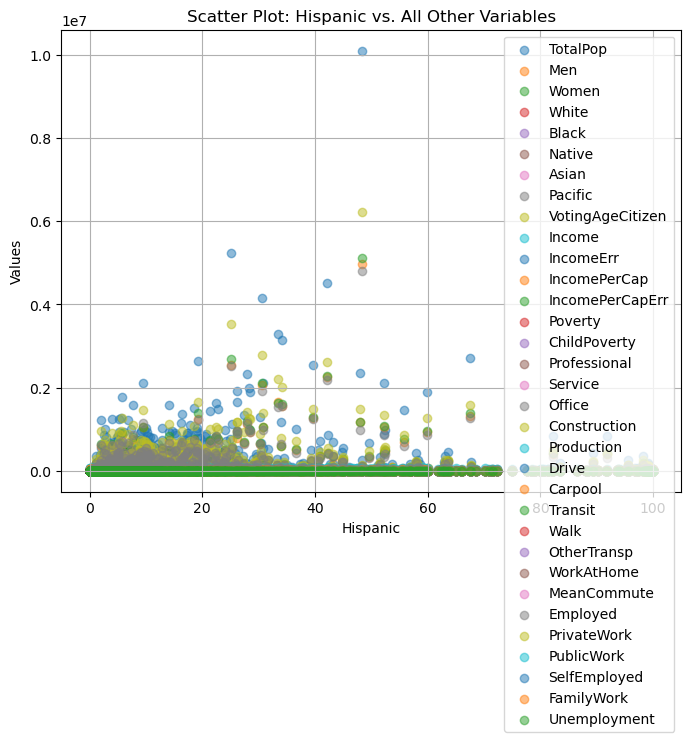

Correlation coefficients for Hispanic:
TotalPop            0.115313
Men                 0.115690
Women               0.114923
White              -0.723133
Black              -0.146798
Native             -0.055992
Asian               0.043484
Pacific            -0.000802
VotingAgeCitizen    0.105976
Income             -0.220418
IncomeErr          -0.004723
IncomePerCap       -0.298711
IncomePerCapErr    -0.039148
Poverty             0.475093
ChildPoverty        0.400672
Professional       -0.099875
Service             0.209838
Office              0.124420
Construction        0.122021
Production         -0.177976
Drive              -0.013509
Carpool             0.087383
Transit             0.082469
Walk               -0.017496
OtherTransp         0.015290
WorkAtHome         -0.119600
MeanCommute         0.033079
Employed            0.104256
PrivateWork        -0.165755
PublicWork          0.193586
SelfEmployed        0.014329
FamilyWork         -0.055282
Unemployment        0.390965
Name

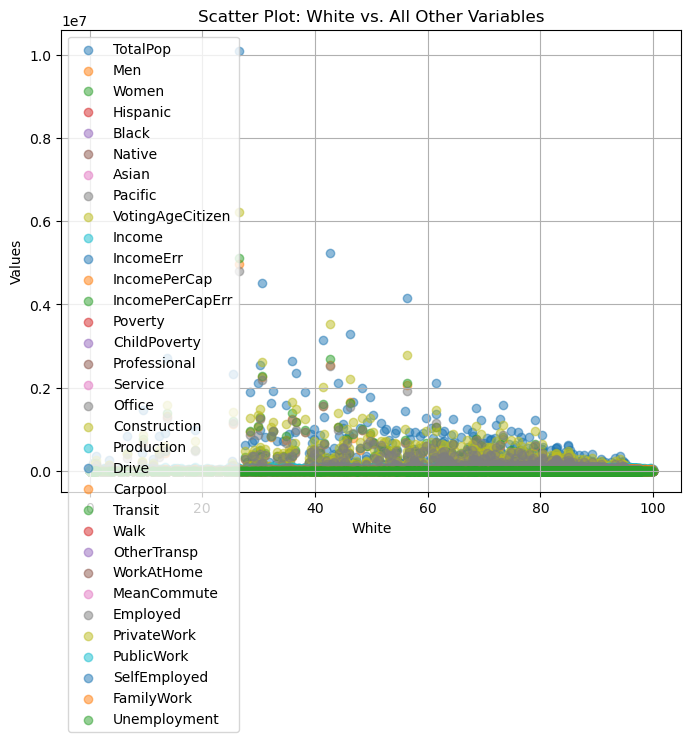

Correlation coefficients for White:
TotalPop           -0.190120
Men                -0.189143
Women              -0.191019
Hispanic           -0.723133
Black              -0.464055
Native             -0.233492
Asian              -0.203173
Pacific            -0.085980
VotingAgeCitizen   -0.185868
Income              0.269813
IncomeErr           0.068567
IncomePerCap        0.345745
IncomePerCapErr     0.108364
Poverty            -0.614074
ChildPoverty       -0.583063
Professional        0.090003
Service            -0.310265
Office             -0.140631
Construction        0.037712
Production          0.148768
Drive               0.064281
Carpool            -0.092594
Transit            -0.172266
Walk               -0.027079
OtherTransp        -0.159670
WorkAtHome          0.222976
MeanCommute        -0.080517
Employed           -0.179954
PrivateWork         0.234623
PublicWork         -0.401596
SelfEmployed        0.188034
FamilyWork          0.106173
Unemployment       -0.569487
Name: W

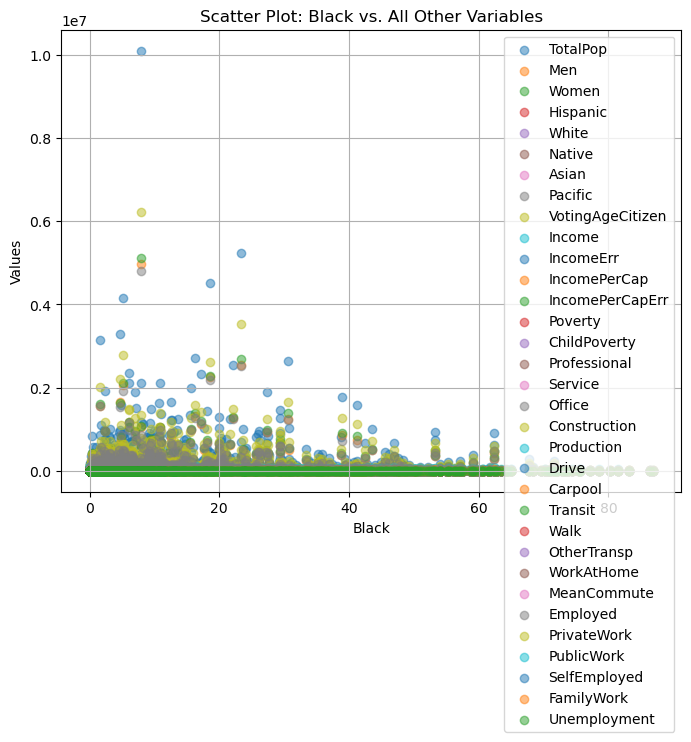

Correlation coefficients for Black:
TotalPop            0.075343
Men                 0.072789
Women               0.077789
Hispanic           -0.146798
White              -0.464055
Native             -0.097481
Asian               0.020714
Pacific            -0.033987
VotingAgeCitizen    0.080638
Income             -0.221971
IncomeErr          -0.081002
IncomePerCap       -0.201641
IncomePerCapErr    -0.081573
Poverty             0.304562
ChildPoverty        0.375584
Professional       -0.121746
Service             0.136203
Office              0.092768
Construction       -0.170187
Production          0.119551
Drive               0.168895
Carpool             0.010058
Transit             0.078096
Walk               -0.179142
OtherTransp         0.005763
WorkAtHome         -0.285199
MeanCommute         0.195935
Employed            0.071414
PrivateWork         0.063822
PublicWork          0.114347
SelfEmployed       -0.302636
FamilyWork         -0.116705
Unemployment        0.295871
Name: B

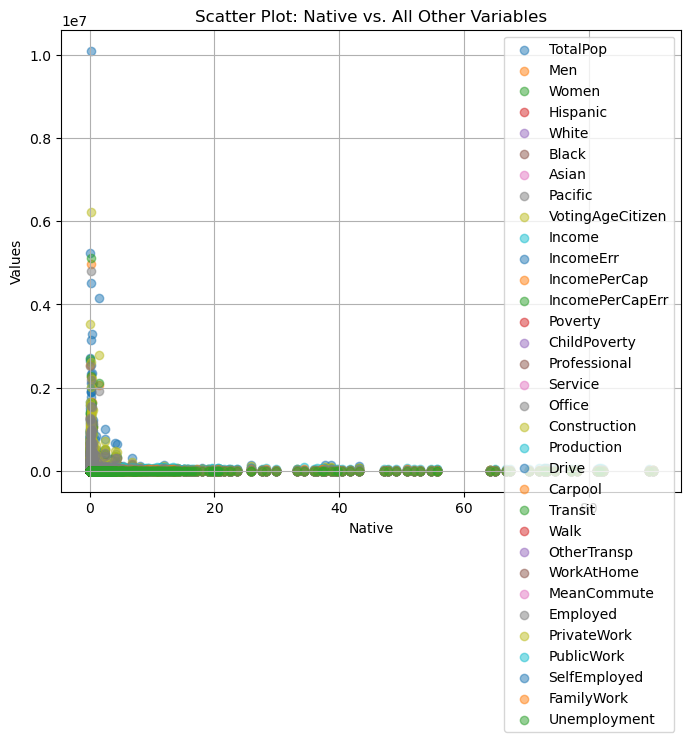

Correlation coefficients for Native:
TotalPop           -0.046952
Men                -0.046744
Women              -0.047142
Hispanic           -0.055992
White              -0.233492
Black              -0.097481
Asian              -0.008448
Pacific             0.022637
VotingAgeCitizen   -0.050812
Income             -0.051424
IncomeErr           0.027491
IncomePerCap       -0.105419
IncomePerCapErr     0.000554
Poverty             0.173415
ChildPoverty        0.143837
Professional        0.050289
Service             0.132913
Office             -0.100493
Construction        0.037622
Production         -0.113928
Drive              -0.328413
Carpool             0.036088
Transit            -0.015835
Walk                0.363157
OtherTransp         0.354174
WorkAtHome          0.146924
MeanCommute        -0.210815
Employed           -0.048030
PrivateWork        -0.427902
PublicWork          0.484344
SelfEmployed        0.037516
FamilyWork          0.073156
Unemployment        0.219615
Name: 

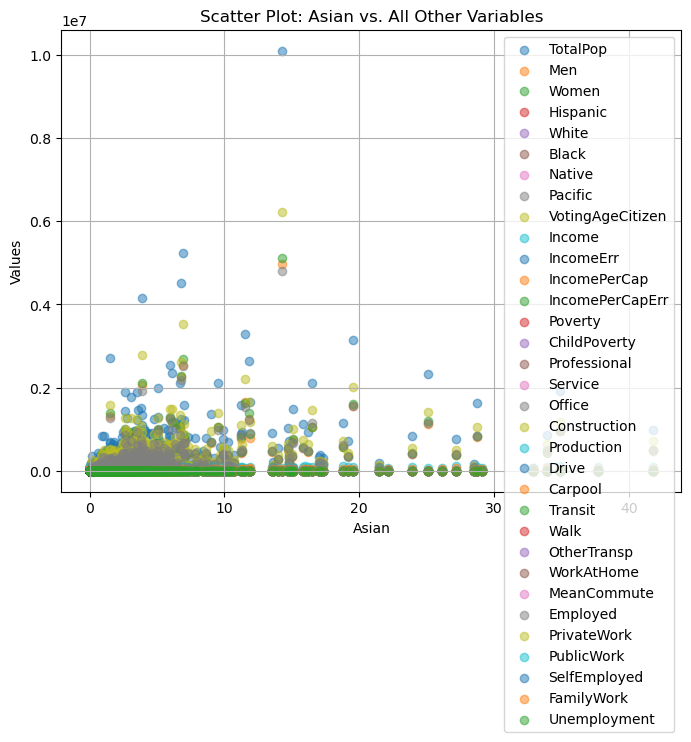

Correlation coefficients for Asian:
TotalPop            0.451447
Men                 0.452566
Women               0.450263
Hispanic            0.043484
White              -0.203173
Black               0.020714
Native             -0.008448
Pacific             0.395106
VotingAgeCitizen    0.459285
Income              0.445988
IncomeErr          -0.155984
IncomePerCap        0.413622
IncomePerCapErr    -0.172452
Poverty            -0.159502
ChildPoverty       -0.184817
Professional        0.363904
Service            -0.016014
Office              0.061719
Construction       -0.310799
Production         -0.210583
Drive              -0.284237
Carpool            -0.035984
Transit             0.441569
Walk                0.162685
OtherTransp         0.128908
WorkAtHome          0.025247
MeanCommute         0.053747
Employed            0.465928
PrivateWork         0.109040
PublicWork         -0.027249
SelfEmployed       -0.161210
FamilyWork         -0.088232
Unemployment       -0.073351
Name: A

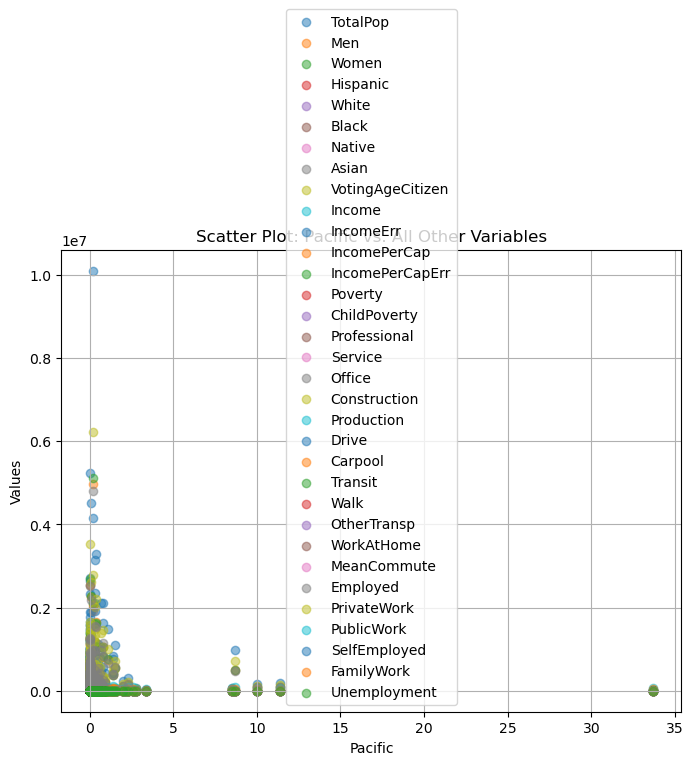

Correlation coefficients for Pacific:
TotalPop            0.029164
Men                 0.030111
Women               0.028243
Hispanic           -0.000802
White              -0.085980
Black              -0.033987
Native              0.022637
Asian               0.395106
VotingAgeCitizen    0.029868
Income              0.065876
IncomeErr           0.041502
IncomePerCap        0.073934
IncomePerCapErr     0.063048
Poverty            -0.033636
ChildPoverty       -0.037282
Professional       -0.015600
Service             0.115452
Office              0.005996
Construction       -0.048881
Production         -0.025540
Drive              -0.144800
Carpool             0.036936
Transit             0.015598
Walk                0.181040
OtherTransp         0.108590
WorkAtHome          0.021561
MeanCommute        -0.069187
Employed            0.028886
PrivateWork        -0.101122
PublicWork          0.133790
SelfEmployed       -0.020086
FamilyWork         -0.012357
Unemployment       -0.038724
Name:

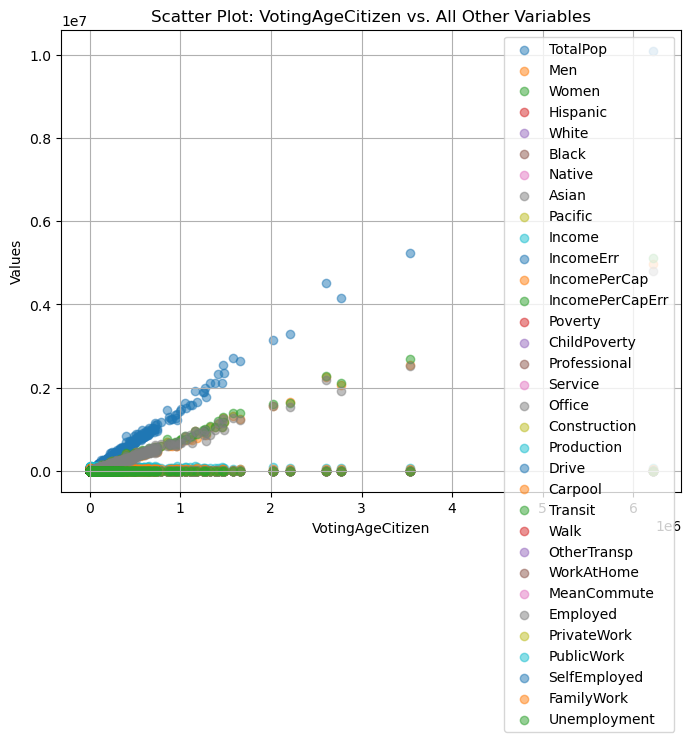

Correlation coefficients for VotingAgeCitizen:
TotalPop           0.996737
Men                0.996225
Women              0.997001
Hispanic           0.105976
White             -0.185868
Black              0.080638
Native            -0.050812
Asian              0.459285
Pacific            0.029868
Income             0.255929
IncomeErr         -0.253530
IncomePerCap       0.265762
IncomePerCapErr   -0.255557
Poverty           -0.075974
ChildPoverty      -0.070339
Professional       0.275323
Service           -0.006750
Office             0.182565
Construction      -0.288198
Production        -0.199026
Drive             -0.114568
Carpool           -0.077640
Transit            0.409929
Walk              -0.047679
OtherTransp        0.038016
WorkAtHome        -0.010377
MeanCommute        0.161880
Employed           0.995511
PrivateWork        0.211664
PublicWork        -0.153928
SelfEmployed      -0.155144
FamilyWork        -0.085603
Unemployment       0.007552
Name: VotingAgeCitizen, dtype

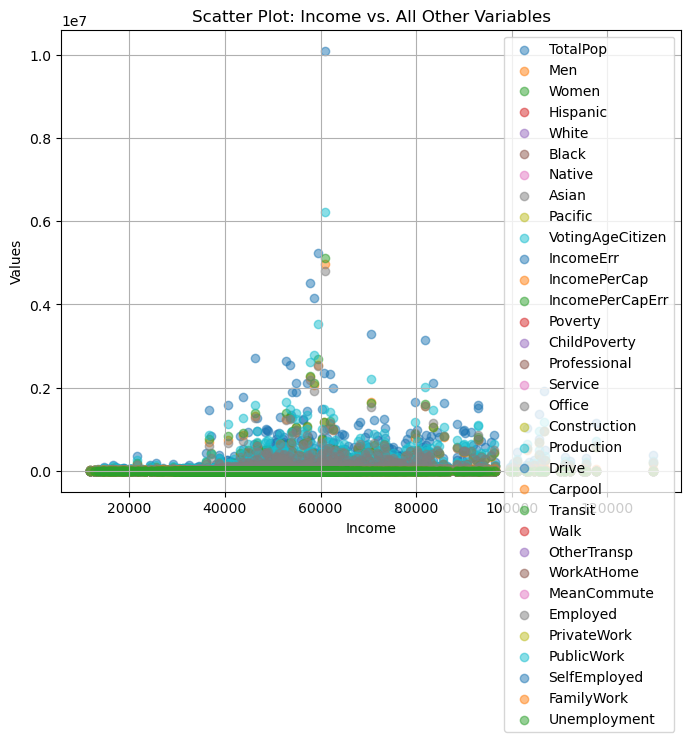

Correlation coefficients for Income:
TotalPop            0.243317
Men                 0.244399
Women               0.242217
Hispanic           -0.220418
White               0.269813
Black              -0.221971
Native             -0.051424
Asian               0.445988
Pacific             0.065876
VotingAgeCitizen    0.255929
IncomeErr           0.042387
IncomePerCap        0.890053
IncomePerCapErr    -0.009496
Poverty            -0.764594
ChildPoverty       -0.753070
Professional        0.592376
Service            -0.359235
Office              0.025814
Construction       -0.207823
Production         -0.299868
Drive              -0.184262
Carpool            -0.123296
Transit             0.258165
Walk                0.058787
OtherTransp         0.015344
WorkAtHome          0.237177
MeanCommute         0.070705
Employed            0.264521
PrivateWork         0.245400
PublicWork         -0.256690
SelfEmployed       -0.055363
FamilyWork         -0.052836
Unemployment       -0.506737
Name: 

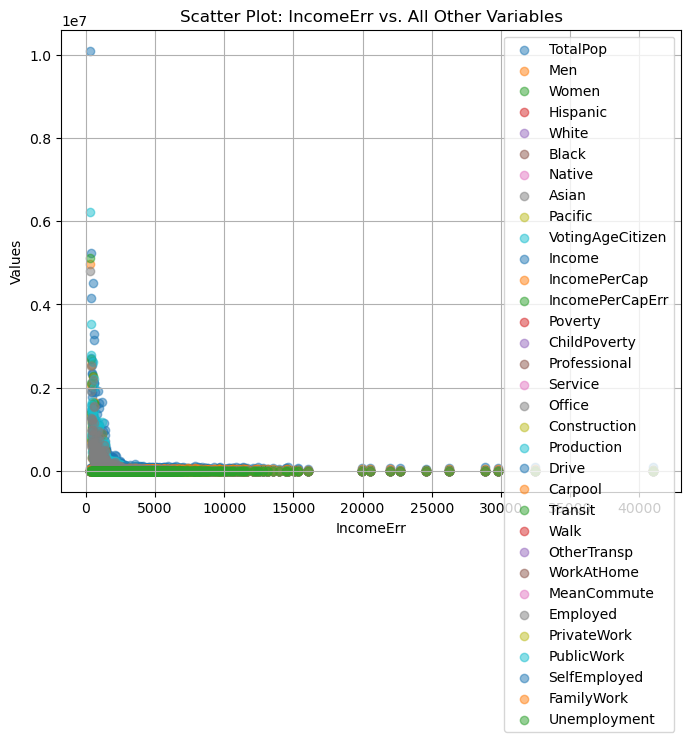

Correlation coefficients for IncomeErr:
TotalPop           -0.237085
Men                -0.236575
Women              -0.237522
Hispanic           -0.004723
White               0.068567
Black              -0.081002
Native              0.027491
Asian              -0.155984
Pacific             0.041502
VotingAgeCitizen   -0.253530
Income              0.042387
IncomePerCap        0.044650
IncomePerCapErr     0.682115
Poverty            -0.126567
ChildPoverty       -0.146057
Professional       -0.041289
Service            -0.071522
Office             -0.302701
Construction        0.410081
Production         -0.035014
Drive              -0.232268
Carpool             0.068647
Transit            -0.109161
Walk                0.280425
OtherTransp         0.034332
WorkAtHome          0.248555
MeanCommute        -0.148133
Employed           -0.233806
PrivateWork        -0.367192
PublicWork          0.214941
SelfEmployed        0.353592
FamilyWork          0.161081
Unemployment       -0.167587
Nam

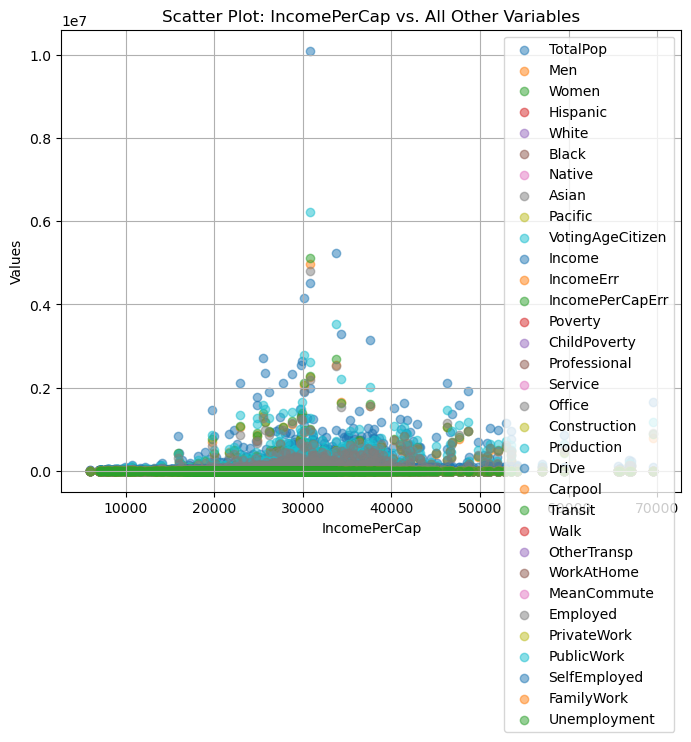

Correlation coefficients for IncomePerCap:
TotalPop            0.247671
Men                 0.247170
Women               0.248098
Hispanic           -0.298711
White               0.345745
Black              -0.201641
Native             -0.105419
Asian               0.413622
Pacific             0.073934
VotingAgeCitizen    0.265762
Income              0.890053
IncomeErr           0.044650
IncomePerCapErr     0.137030
Poverty            -0.750996
ChildPoverty       -0.730014
Professional        0.660036
Service            -0.329489
Office              0.003949
Construction       -0.244635
Production         -0.357096
Drive              -0.249025
Carpool            -0.186870
Transit             0.319813
Walk                0.115409
OtherTransp         0.023091
WorkAtHome          0.322444
MeanCommute        -0.019552
Employed            0.271835
PrivateWork         0.210159
PublicWork         -0.297668
SelfEmployed        0.076686
FamilyWork         -0.001908
Unemployment       -0.538180


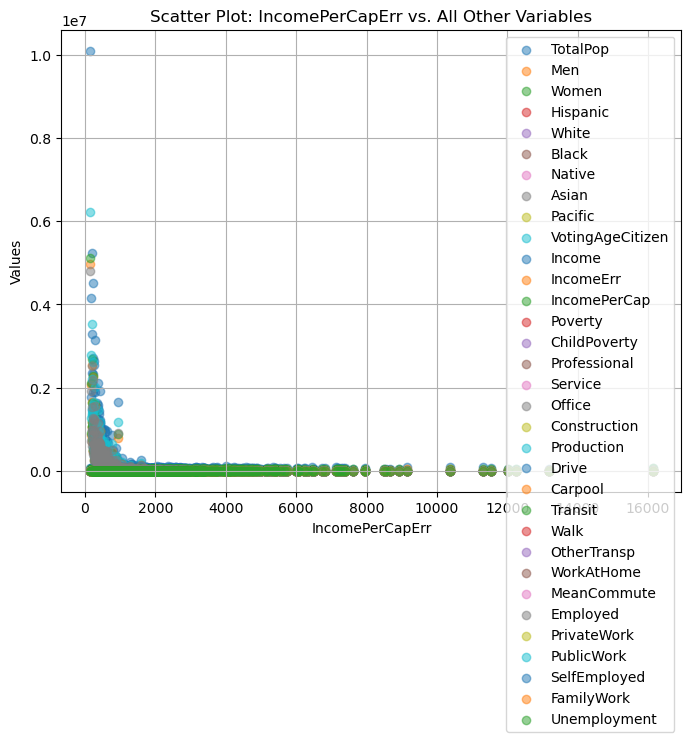

Correlation coefficients for IncomePerCapErr:
TotalPop           -0.239664
Men                -0.239372
Women              -0.239890
Hispanic           -0.039148
White               0.108364
Black              -0.081573
Native              0.000554
Asian              -0.172452
Pacific             0.063048
VotingAgeCitizen   -0.255557
Income             -0.009496
IncomeErr           0.682115
IncomePerCap        0.137030
Poverty            -0.127742
ChildPoverty       -0.137253
Professional        0.007275
Service            -0.064381
Office             -0.287283
Construction        0.365258
Production         -0.070596
Drive              -0.256118
Carpool             0.036578
Transit            -0.107377
Walk                0.283772
OtherTransp         0.033965
WorkAtHome          0.333144
MeanCommute        -0.199957
Employed           -0.236122
PrivateWork        -0.385769
PublicWork          0.170250
SelfEmployed        0.455743
FamilyWork          0.237939
Unemployment       -0.1936

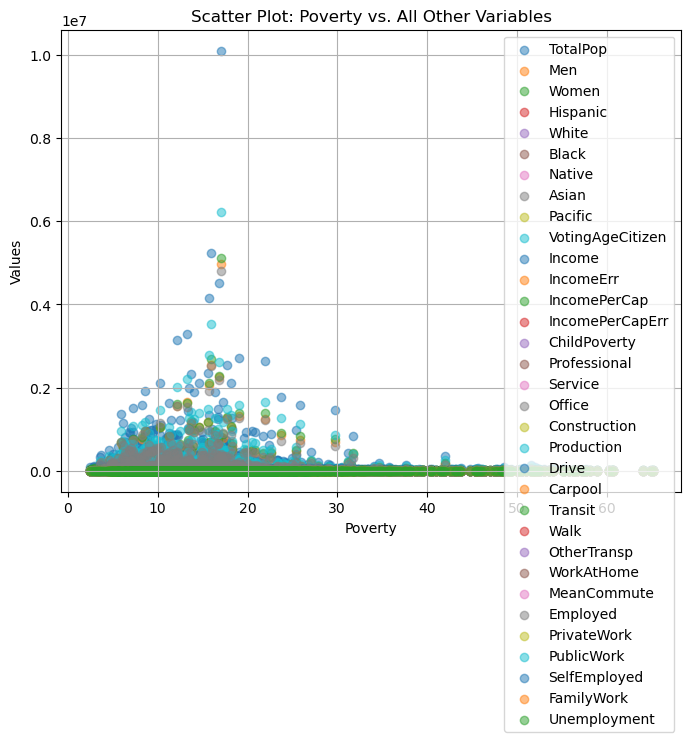

Correlation coefficients for Poverty:
TotalPop           -0.069048
Men                -0.070075
Women              -0.068041
Hispanic            0.475093
White              -0.614074
Black               0.304562
Native              0.173415
Asian              -0.159502
Pacific            -0.033636
VotingAgeCitizen   -0.075974
Income             -0.764594
IncomeErr          -0.126567
IncomePerCap       -0.750996
IncomePerCapErr    -0.127742
ChildPoverty        0.938231
Professional       -0.348950
Service             0.378409
Office              0.083593
Construction        0.009186
Production          0.096030
Drive               0.109400
Carpool             0.053229
Transit            -0.036551
Walk               -0.024315
OtherTransp         0.054411
WorkAtHome         -0.286252
MeanCommute         0.091928
Employed           -0.084364
PrivateWork        -0.262574
PublicWork          0.391036
SelfEmployed       -0.122639
FamilyWork         -0.041274
Unemployment        0.730875
Name:

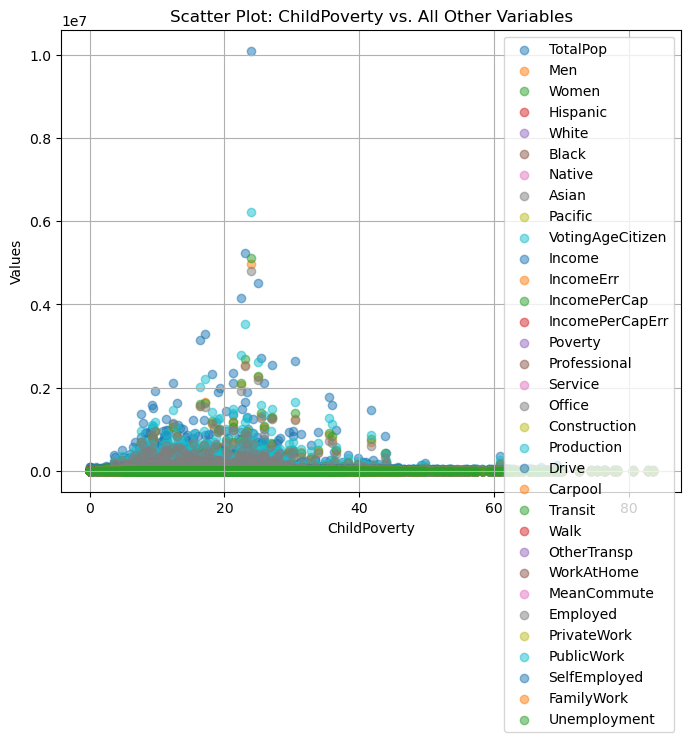

Correlation coefficients for ChildPoverty:
TotalPop           -0.063564
Men                -0.064806
Women              -0.062351
Hispanic            0.400672
White              -0.583063
Black               0.375584
Native              0.143837
Asian              -0.184817
Pacific            -0.037282
VotingAgeCitizen   -0.070339
Income             -0.753070
IncomeErr          -0.146057
IncomePerCap       -0.730014
IncomePerCapErr    -0.137253
Poverty             0.938231
Professional       -0.423642
Service             0.369171
Office              0.084600
Construction        0.039307
Production          0.163828
Drive               0.153492
Carpool             0.083971
Transit            -0.050164
Walk               -0.094060
OtherTransp         0.029433
WorkAtHome         -0.310412
MeanCommute         0.120519
Employed           -0.079780
PrivateWork        -0.192667
PublicWork          0.319154
SelfEmployed       -0.140418
FamilyWork         -0.056035
Unemployment        0.685591


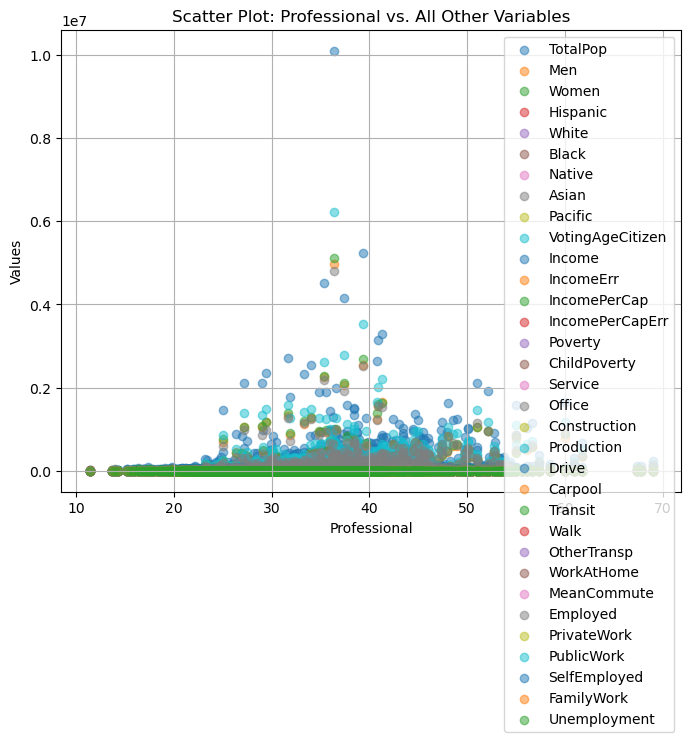

Correlation coefficients for Professional:
TotalPop            0.255239
Men                 0.254020
Women               0.256356
Hispanic           -0.099875
White               0.090003
Black              -0.121746
Native              0.050289
Asian               0.363904
Pacific            -0.015600
VotingAgeCitizen    0.275323
Income              0.592376
IncomeErr          -0.041289
IncomePerCap        0.660036
IncomePerCapErr     0.007275
Poverty            -0.348950
ChildPoverty       -0.423642
Service            -0.295039
Office             -0.006549
Construction       -0.393507
Production         -0.649015
Drive              -0.264227
Carpool            -0.269771
Transit             0.296576
Walk                0.157374
OtherTransp         0.057614
WorkAtHome          0.391809
MeanCommute        -0.074482
Employed            0.274790
PrivateWork        -0.128020
PublicWork          0.060636
SelfEmployed        0.147346
FamilyWork          0.053021
Unemployment       -0.262633


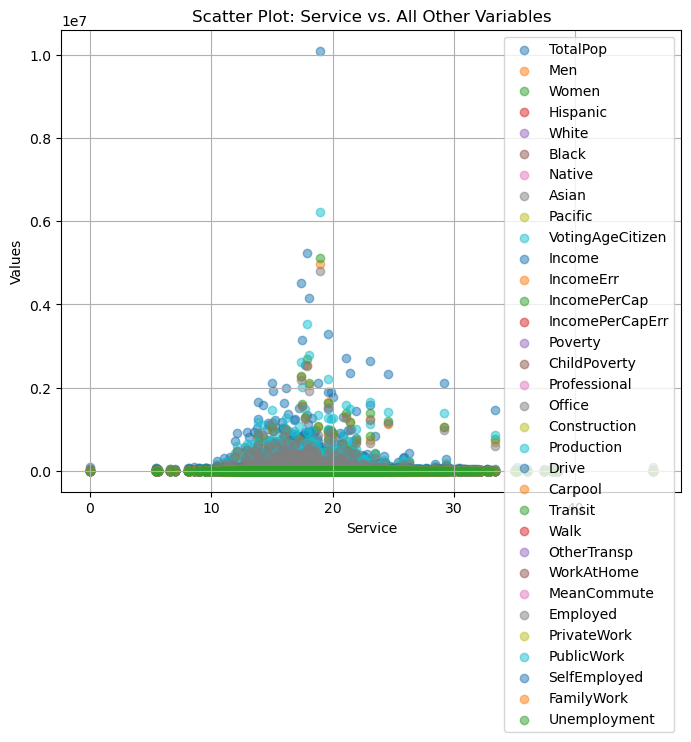

Correlation coefficients for Service:
TotalPop           -0.004842
Men                -0.004812
Women              -0.004870
Hispanic            0.209838
White              -0.310265
Black               0.136203
Native              0.132913
Asian              -0.016014
Pacific             0.115452
VotingAgeCitizen   -0.006750
Income             -0.359235
IncomeErr          -0.071522
IncomePerCap       -0.329489
IncomePerCapErr    -0.064381
Poverty             0.378409
ChildPoverty        0.369171
Professional       -0.295039
Office             -0.013263
Construction       -0.112427
Production         -0.225313
Drive              -0.081117
Carpool             0.075887
Transit             0.044087
Walk                0.121585
OtherTransp         0.121803
WorkAtHome         -0.136055
MeanCommute        -0.044604
Employed           -0.018026
PrivateWork        -0.224621
PublicWork          0.359035
SelfEmployed       -0.142718
FamilyWork         -0.061820
Unemployment        0.344190
Name:

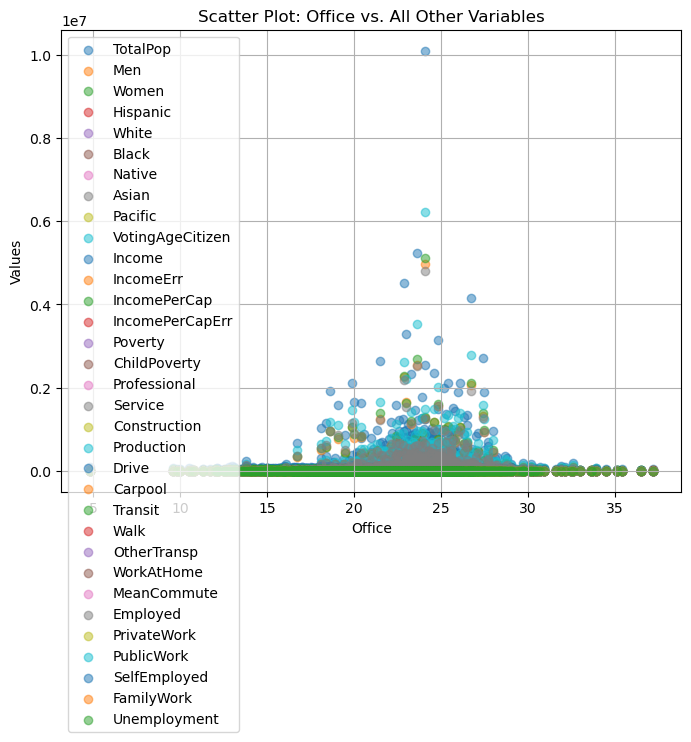

Correlation coefficients for Office:
TotalPop            0.168049
Men                 0.167121
Women               0.168905
Hispanic            0.124420
White              -0.140631
Black               0.092768
Native             -0.100493
Asian               0.061719
Pacific             0.005996
VotingAgeCitizen    0.182565
Income              0.025814
IncomeErr          -0.302701
IncomePerCap        0.003949
IncomePerCapErr    -0.287283
Poverty             0.083593
ChildPoverty        0.084600
Professional       -0.006549
Service            -0.013263
Construction       -0.391355
Production         -0.250060
Drive               0.263657
Carpool            -0.131488
Transit             0.017104
Walk               -0.240188
OtherTransp        -0.019270
WorkAtHome         -0.232941
MeanCommute         0.182316
Employed            0.160434
PrivateWork         0.268531
PublicWork         -0.122843
SelfEmployed       -0.308961
FamilyWork         -0.175842
Unemployment        0.182139
Name: 

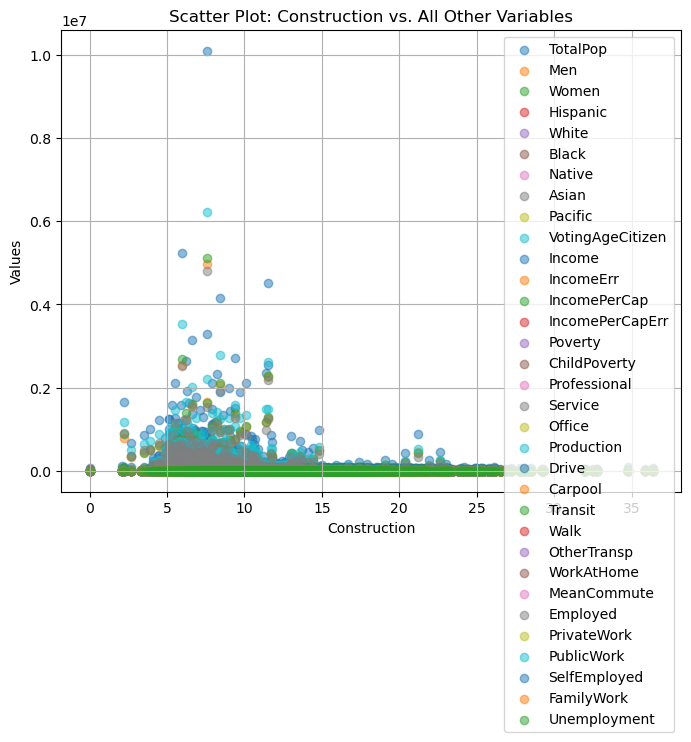

Correlation coefficients for Construction:
TotalPop           -0.264476
Men                -0.262624
Women              -0.266202
Hispanic            0.122021
White               0.037712
Black              -0.170187
Native              0.037622
Asian              -0.310799
Pacific            -0.048881
VotingAgeCitizen   -0.288198
Income             -0.207823
IncomeErr           0.410081
IncomePerCap       -0.244635
IncomePerCapErr     0.365258
Poverty             0.009186
ChildPoverty        0.039307
Professional       -0.393507
Service            -0.112427
Office             -0.391355
Production          0.014699
Drive              -0.122577
Carpool             0.278208
Transit            -0.216069
Walk                0.092835
OtherTransp        -0.025840
WorkAtHome          0.150547
MeanCommute        -0.047616
Employed           -0.270836
PrivateWork        -0.287870
PublicWork          0.102775
SelfEmployed        0.375648
FamilyWork          0.217972
Unemployment       -0.075824


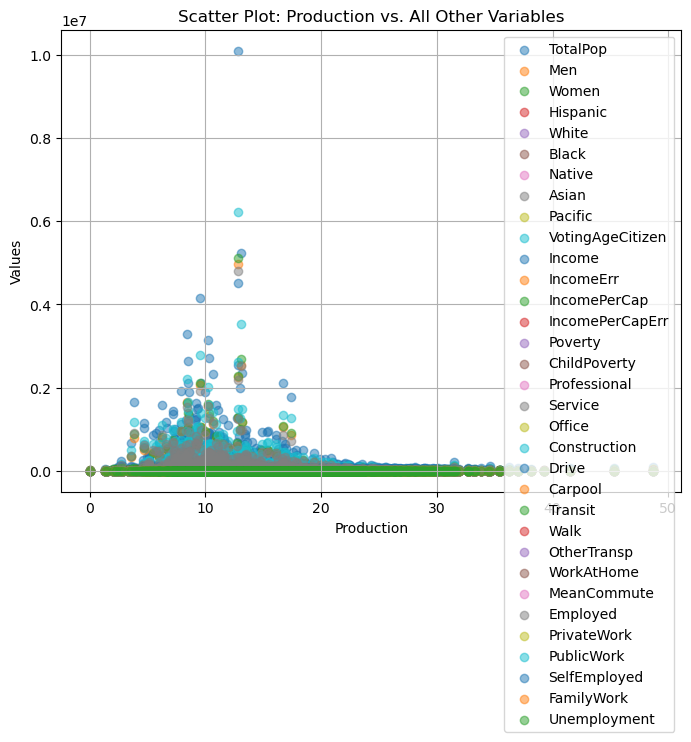

Correlation coefficients for Production:
TotalPop           -0.186687
Men                -0.186153
Women              -0.187160
Hispanic           -0.177976
White               0.148768
Black               0.119551
Native             -0.113928
Asian              -0.210583
Pacific            -0.025540
VotingAgeCitizen   -0.199026
Income             -0.299868
IncomeErr          -0.035014
IncomePerCap       -0.357096
IncomePerCapErr    -0.070596
Poverty             0.096030
ChildPoverty        0.163828
Professional       -0.649015
Service            -0.225313
Office             -0.250060
Construction        0.014699
Drive               0.292717
Carpool             0.127421
Transit            -0.216924
Walk               -0.190414
OtherTransp        -0.114089
WorkAtHome         -0.332661
MeanCommute         0.047014
Employed           -0.191493
PrivateWork         0.347228
PublicWork         -0.305591
SelfEmployed       -0.172942
FamilyWork         -0.079003
Unemployment        0.028068
Na

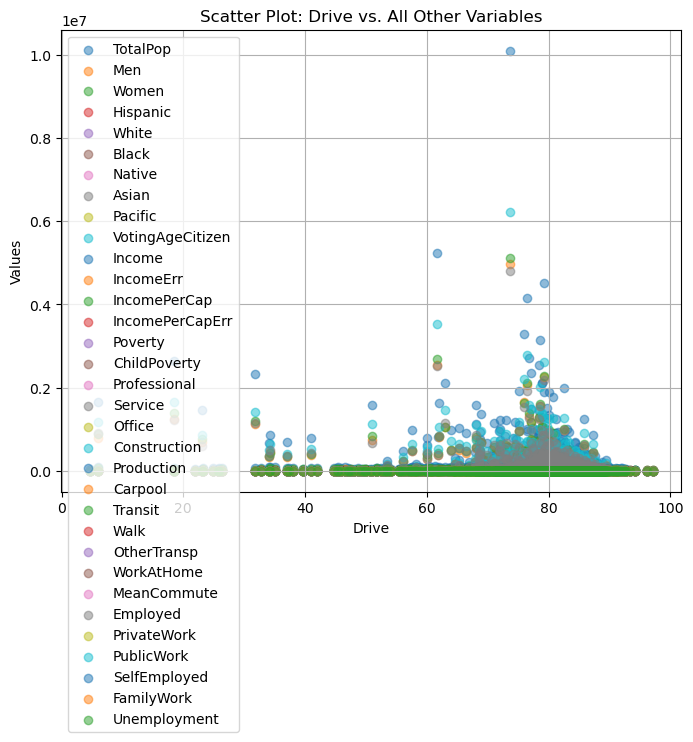

Correlation coefficients for Drive:
TotalPop           -0.117811
Men                -0.116053
Women              -0.119481
Hispanic           -0.013509
White               0.064281
Black               0.168895
Native             -0.328413
Asian              -0.284237
Pacific            -0.144800
VotingAgeCitizen   -0.114568
Income             -0.184262
IncomeErr          -0.232268
IncomePerCap       -0.249025
IncomePerCapErr    -0.256118
Poverty             0.109400
ChildPoverty        0.153492
Professional       -0.264227
Service            -0.081117
Office              0.263657
Construction       -0.122577
Production          0.292717
Carpool            -0.285060
Transit            -0.451487
Walk               -0.752972
OtherTransp        -0.503483
WorkAtHome         -0.539118
MeanCommute         0.220106
Employed           -0.125118
PrivateWork         0.385072
PublicWork         -0.233794
SelfEmployed       -0.348199
FamilyWork         -0.239066
Unemployment        0.084440
Name: D

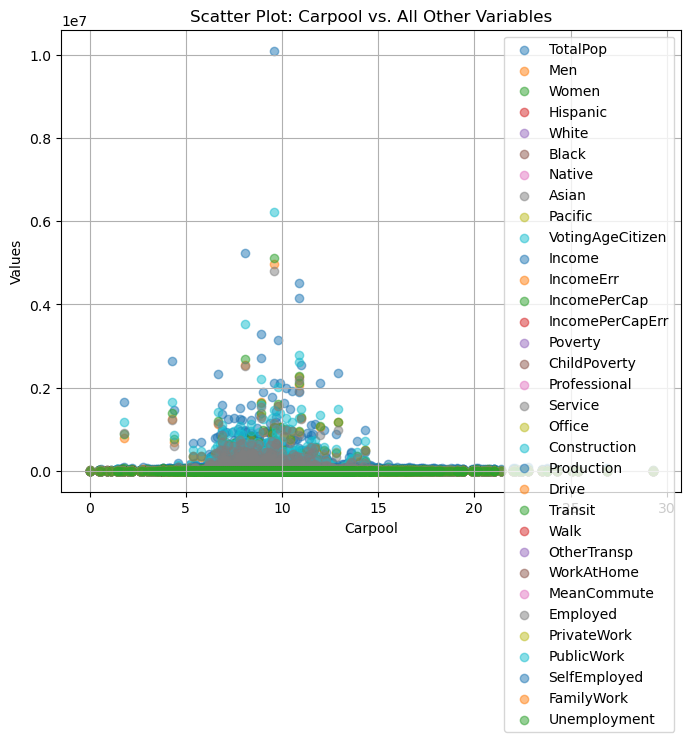

Correlation coefficients for Carpool:
TotalPop           -0.066854
Men                -0.065380
Women              -0.068261
Hispanic            0.087383
White              -0.092594
Black               0.010058
Native              0.036088
Asian              -0.035984
Pacific             0.036936
VotingAgeCitizen   -0.077640
Income             -0.123296
IncomeErr           0.068647
IncomePerCap       -0.186870
IncomePerCapErr     0.036578
Poverty             0.053229
ChildPoverty        0.083971
Professional       -0.269771
Service             0.075887
Office             -0.131488
Construction        0.278208
Production          0.127421
Drive              -0.285060
Transit            -0.099336
Walk               -0.047330
OtherTransp        -0.004638
WorkAtHome         -0.092047
MeanCommute         0.029301
Employed           -0.071736
PrivateWork        -0.073691
PublicWork          0.075264
SelfEmployed        0.018134
FamilyWork          0.022578
Unemployment        0.047877
Name:

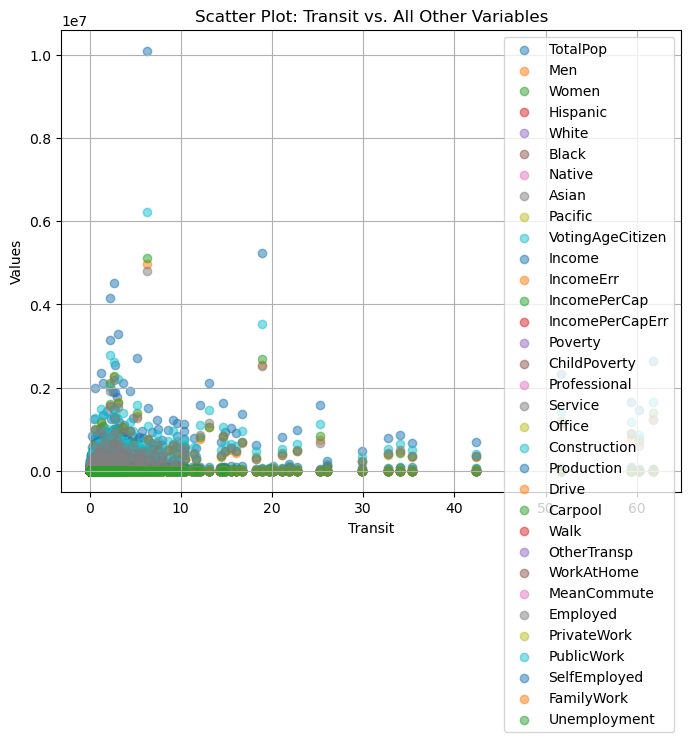

Correlation coefficients for Transit:
TotalPop            0.401662
Men                 0.395659
Women               0.407358
Hispanic            0.082469
White              -0.172266
Black               0.078096
Native             -0.015835
Asian               0.441569
Pacific             0.015598
VotingAgeCitizen    0.409929
Income              0.258165
IncomeErr          -0.109161
IncomePerCap        0.319813
IncomePerCapErr    -0.107377
Poverty            -0.036551
ChildPoverty       -0.050164
Professional        0.296576
Service             0.044087
Office              0.017104
Construction       -0.216069
Production         -0.216924
Drive              -0.451487
Carpool            -0.099336
Walk                0.115612
OtherTransp         0.109800
WorkAtHome          0.015601
MeanCommute         0.198880
Employed            0.412465
PrivateWork         0.079850
PublicWork         -0.030329
SelfEmployed       -0.101464
FamilyWork         -0.057750
Unemployment        0.016210
Name:

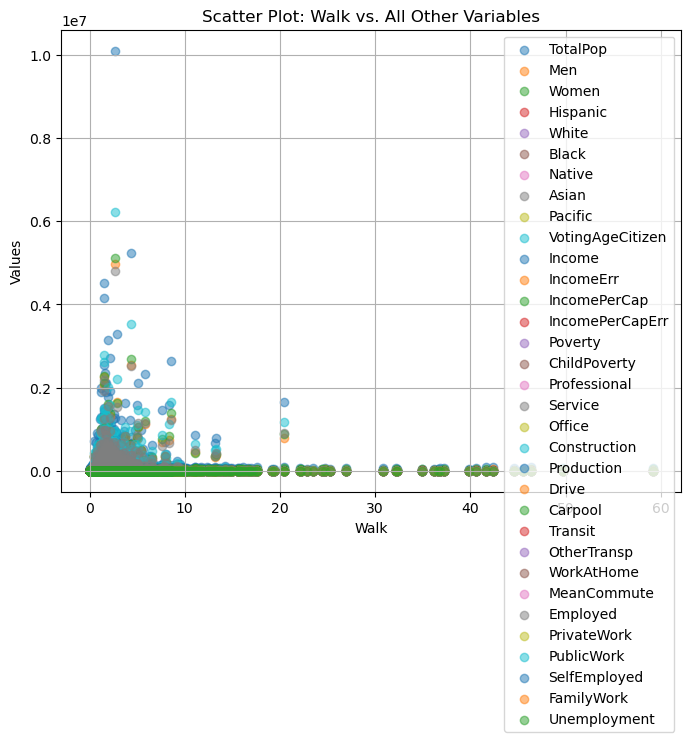

Correlation coefficients for Walk:
TotalPop           -0.044535
Men                -0.044857
Women              -0.044213
Hispanic           -0.017496
White              -0.027079
Black              -0.179142
Native              0.363157
Asian               0.162685
Pacific             0.181040
VotingAgeCitizen   -0.047679
Income              0.058787
IncomeErr           0.280425
IncomePerCap        0.115409
IncomePerCapErr     0.283772
Poverty            -0.024315
ChildPoverty       -0.094060
Professional        0.157374
Service             0.121585
Office             -0.240188
Construction        0.092835
Production         -0.190414
Drive              -0.752972
Carpool            -0.047330
Transit             0.115612
OtherTransp         0.432634
WorkAtHome          0.305677
MeanCommute        -0.407669
Employed           -0.040067
PrivateWork        -0.388654
PublicWork          0.296990
SelfEmployed        0.253091
FamilyWork          0.219420
Unemployment       -0.056641
Name: Wa

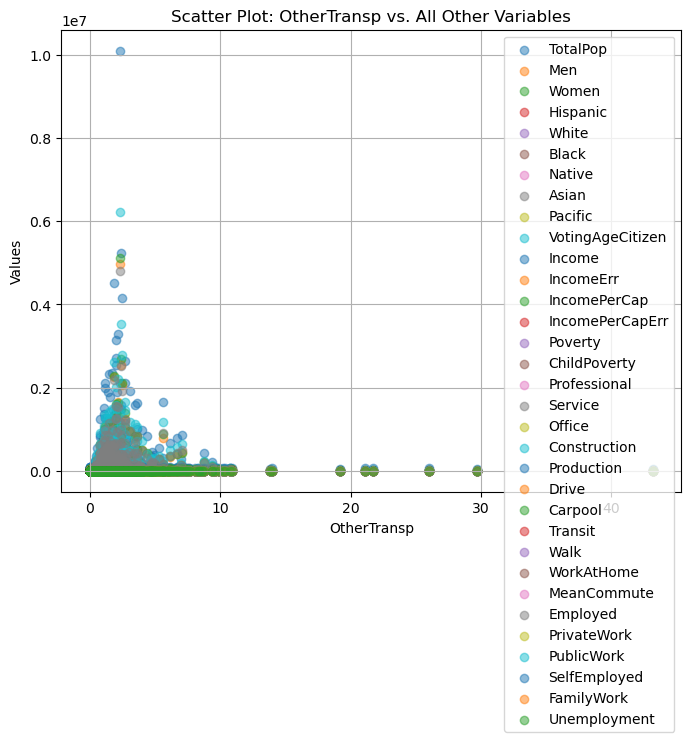

Correlation coefficients for OtherTransp:
TotalPop            0.038227
Men                 0.038547
Women               0.037910
Hispanic            0.015290
White              -0.159670
Black               0.005763
Native              0.354174
Asian               0.128908
Pacific             0.108590
VotingAgeCitizen    0.038016
Income              0.015344
IncomeErr           0.034332
IncomePerCap        0.023091
IncomePerCapErr     0.033965
Poverty             0.054411
ChildPoverty        0.029433
Professional        0.057614
Service             0.121803
Office             -0.019270
Construction       -0.025840
Production         -0.114089
Drive              -0.503483
Carpool            -0.004638
Transit             0.109800
Walk                0.432634
WorkAtHome          0.056508
MeanCommute        -0.154216
Employed            0.038510
PrivateWork        -0.202461
PublicWork          0.249368
SelfEmployed       -0.010755
FamilyWork         -0.012554
Unemployment        0.145172
N

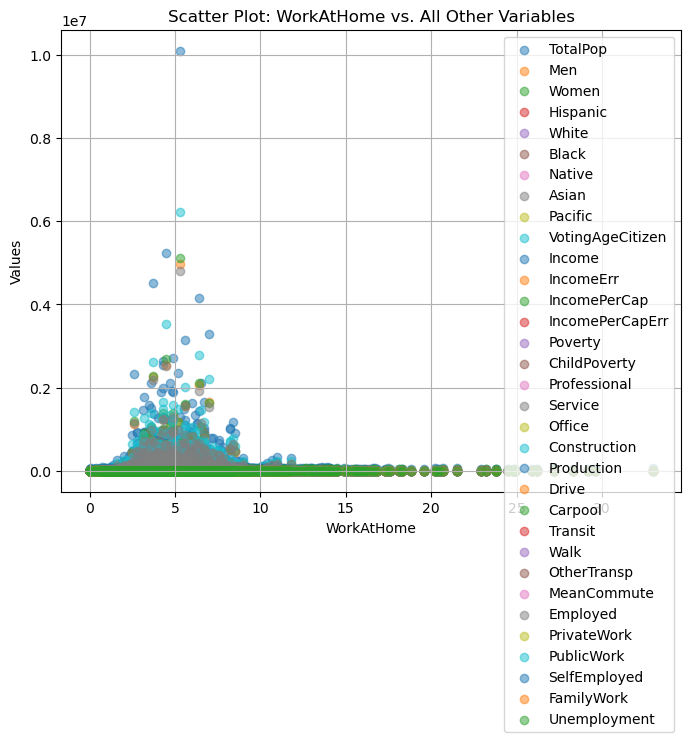

Correlation coefficients for WorkAtHome:
TotalPop           -0.008508
Men                -0.008084
Women              -0.008915
Hispanic           -0.119600
White               0.222976
Black              -0.285199
Native              0.146924
Asian               0.025247
Pacific             0.021561
VotingAgeCitizen   -0.010377
Income              0.237177
IncomeErr           0.248555
IncomePerCap        0.322444
IncomePerCapErr     0.333144
Poverty            -0.286252
ChildPoverty       -0.310412
Professional        0.391809
Service            -0.136055
Office             -0.232941
Construction        0.150547
Production         -0.332661
Drive              -0.539118
Carpool            -0.092047
Transit             0.015601
Walk                0.305677
OtherTransp         0.056508
MeanCommute        -0.175076
Employed           -0.002183
PrivateWork        -0.366208
PublicWork          0.028378
SelfEmployed        0.637610
FamilyWork          0.361357
Unemployment       -0.280243
Na

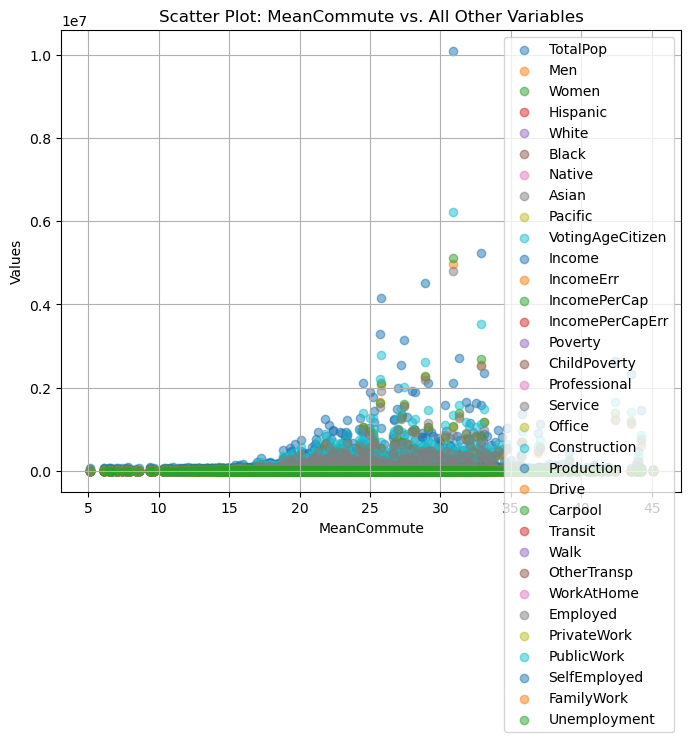

Correlation coefficients for MeanCommute:
TotalPop            0.158288
Men                 0.157212
Women               0.159290
Hispanic            0.033079
White              -0.080517
Black               0.195935
Native             -0.210815
Asian               0.053747
Pacific            -0.069187
VotingAgeCitizen    0.161880
Income              0.070705
IncomeErr          -0.148133
IncomePerCap       -0.019552
IncomePerCapErr    -0.199957
Poverty             0.091928
ChildPoverty        0.120519
Professional       -0.074482
Service            -0.044604
Office              0.182316
Construction       -0.047616
Production          0.047014
Drive               0.220106
Carpool             0.029301
Transit             0.198880
Walk               -0.407669
OtherTransp        -0.154216
WorkAtHome         -0.175076
Employed            0.157199
PrivateWork         0.229295
PublicWork         -0.117750
SelfEmployed       -0.242141
FamilyWork         -0.151606
Unemployment        0.236681
N

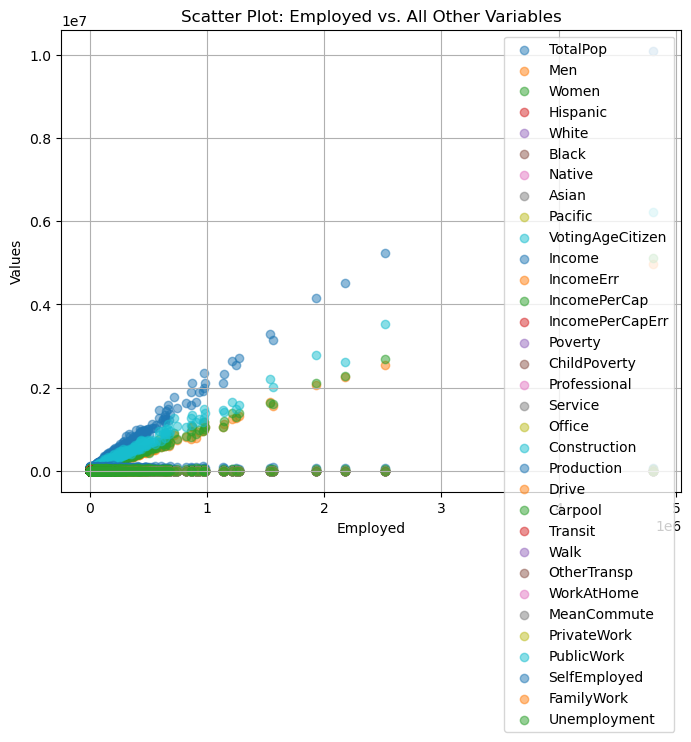

Correlation coefficients for Employed:
TotalPop            0.997863
Men                 0.997744
Women               0.997748
Hispanic            0.104256
White              -0.179954
Black               0.071414
Native             -0.048030
Asian               0.465928
Pacific             0.028886
VotingAgeCitizen    0.995511
Income              0.264521
IncomeErr          -0.233806
IncomePerCap        0.271835
IncomePerCapErr    -0.236122
Poverty            -0.084364
ChildPoverty       -0.079780
Professional        0.274790
Service            -0.018026
Office              0.160434
Construction       -0.270836
Production         -0.191493
Drive              -0.125118
Carpool            -0.071736
Transit             0.412465
Walk               -0.040067
OtherTransp         0.038510
WorkAtHome         -0.002183
MeanCommute         0.157199
PrivateWork         0.200977
PublicWork         -0.150623
SelfEmployed       -0.140207
FamilyWork         -0.078720
Unemployment       -0.006417
Name

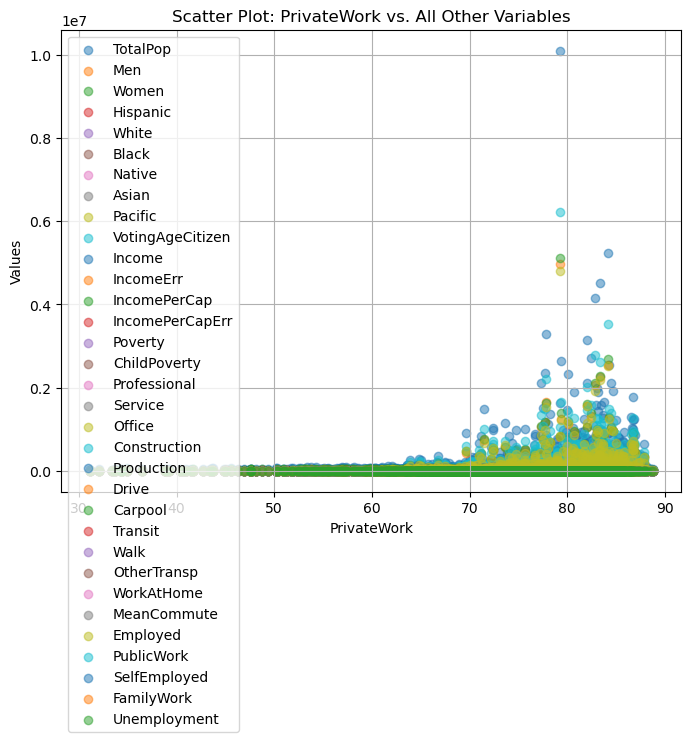

Correlation coefficients for PrivateWork:
TotalPop            0.196874
Men                 0.196004
Women               0.197667
Hispanic           -0.165755
White               0.234623
Black               0.063822
Native             -0.427902
Asian               0.109040
Pacific            -0.101122
VotingAgeCitizen    0.211664
Income              0.245400
IncomeErr          -0.367192
IncomePerCap        0.210159
IncomePerCapErr    -0.385769
Poverty            -0.262574
ChildPoverty       -0.192667
Professional       -0.128020
Service            -0.224621
Office              0.268531
Construction       -0.287870
Production          0.347228
Drive               0.385072
Carpool            -0.073691
Transit             0.079850
Walk               -0.388654
OtherTransp        -0.202461
WorkAtHome         -0.366208
MeanCommute         0.229295
Employed            0.200977
PublicWork         -0.849949
SelfEmployed       -0.543115
FamilyWork         -0.273760
Unemployment       -0.178369
N

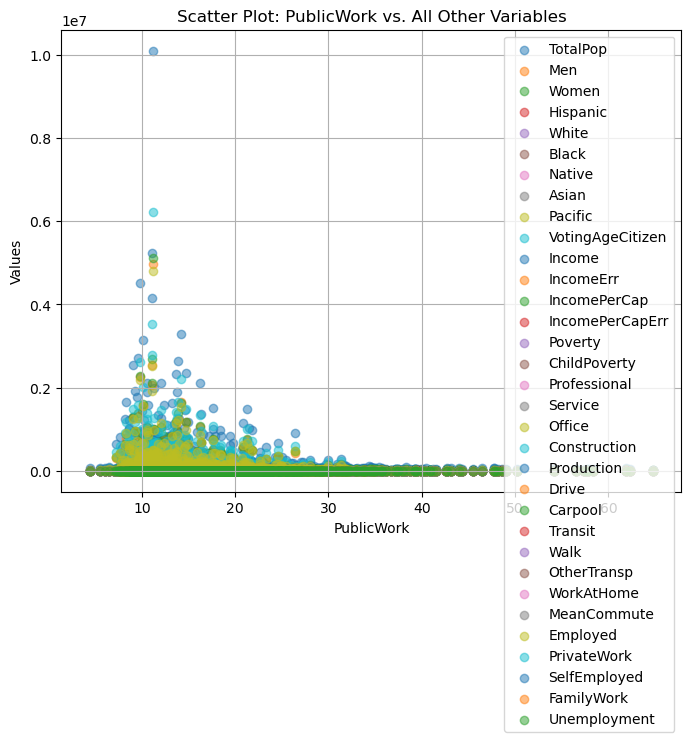

Correlation coefficients for PublicWork:
TotalPop           -0.145169
Men                -0.144308
Women              -0.145966
Hispanic            0.193586
White              -0.401596
Black               0.114347
Native              0.484344
Asian              -0.027249
Pacific             0.133790
VotingAgeCitizen   -0.153928
Income             -0.256690
IncomeErr           0.214941
IncomePerCap       -0.297668
IncomePerCapErr     0.170250
Poverty             0.391036
ChildPoverty        0.319154
Professional        0.060636
Service             0.359035
Office             -0.122843
Construction        0.102775
Production         -0.305591
Drive              -0.233794
Carpool             0.075264
Transit            -0.030329
Walk                0.296990
OtherTransp         0.249368
WorkAtHome          0.028378
MeanCommute        -0.117750
Employed           -0.150623
PrivateWork        -0.849949
SelfEmployed        0.022690
FamilyWork          0.048994
Unemployment        0.358940
Na

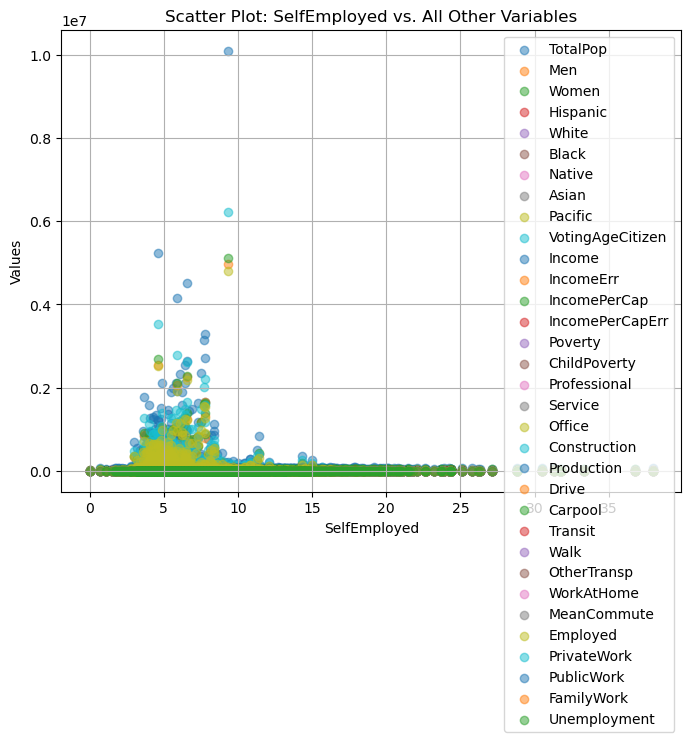

Correlation coefficients for SelfEmployed:
TotalPop           -0.141051
Men                -0.140777
Women              -0.141282
Hispanic            0.014329
White               0.188034
Black              -0.302636
Native              0.037516
Asian              -0.161210
Pacific            -0.020086
VotingAgeCitizen   -0.155144
Income             -0.055363
IncomeErr           0.353592
IncomePerCap        0.076686
IncomePerCapErr     0.455743
Poverty            -0.122639
ChildPoverty       -0.140418
Professional        0.147346
Service            -0.142718
Office             -0.308961
Construction        0.375648
Production         -0.172942
Drive              -0.348199
Carpool             0.018134
Transit            -0.101464
Walk                0.253091
OtherTransp        -0.010755
WorkAtHome          0.637610
MeanCommute        -0.242141
Employed           -0.140207
PrivateWork        -0.543115
PublicWork          0.022690
FamilyWork          0.346178
Unemployment       -0.229710


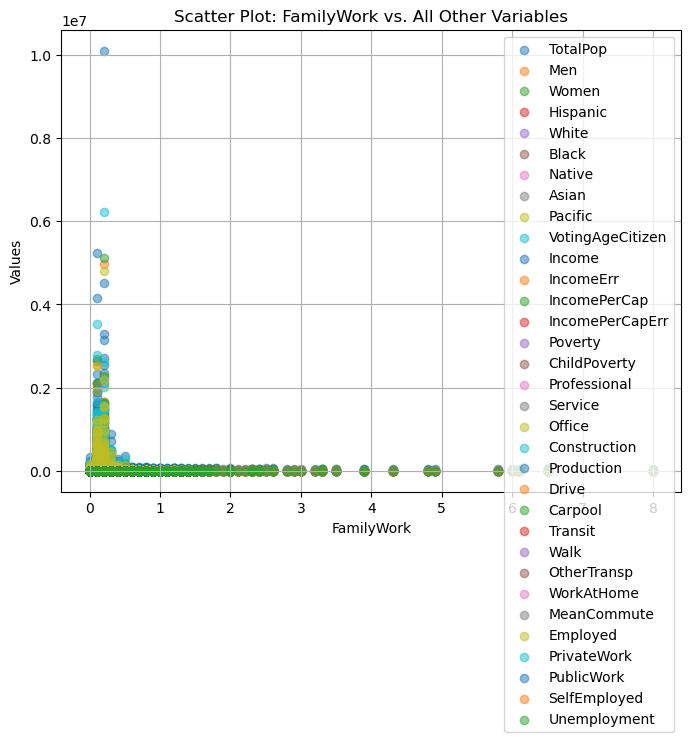

Correlation coefficients for FamilyWork:
TotalPop           -0.079245
Men                -0.079039
Women              -0.079425
Hispanic           -0.055282
White               0.106173
Black              -0.116705
Native              0.073156
Asian              -0.088232
Pacific            -0.012357
VotingAgeCitizen   -0.085603
Income             -0.052836
IncomeErr           0.161081
IncomePerCap       -0.001908
IncomePerCapErr     0.237939
Poverty            -0.041274
ChildPoverty       -0.056035
Professional        0.053021
Service            -0.061820
Office             -0.175842
Construction        0.217972
Production         -0.079003
Drive              -0.239066
Carpool             0.022578
Transit            -0.057750
Walk                0.219420
OtherTransp        -0.012554
WorkAtHome          0.361357
MeanCommute        -0.151606
Employed           -0.078720
PrivateWork        -0.273760
PublicWork          0.048994
SelfEmployed        0.346178
Unemployment       -0.100279
Na

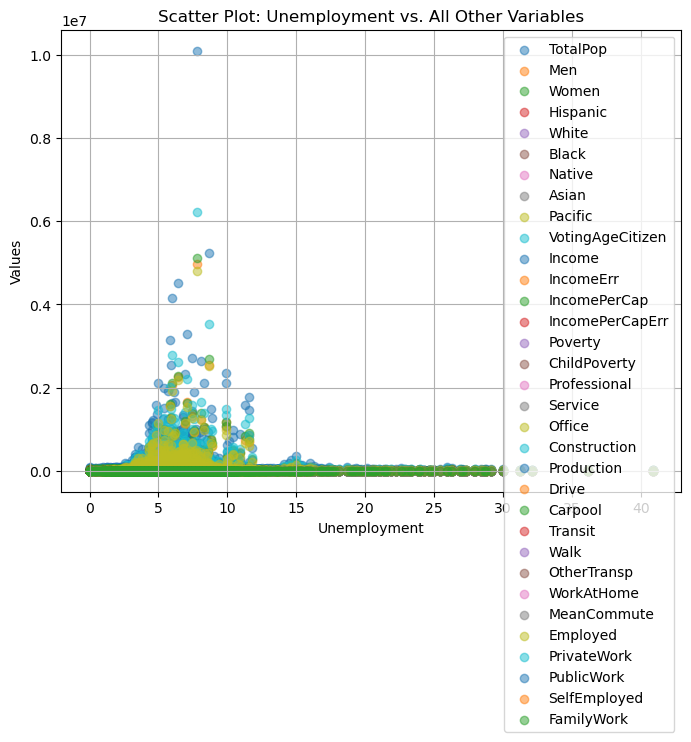

Correlation coefficients for Unemployment:
TotalPop            0.007856
Men                 0.006996
Women               0.008683
Hispanic            0.390965
White              -0.569487
Black               0.295871
Native              0.219615
Asian              -0.073351
Pacific            -0.038724
VotingAgeCitizen    0.007552
Income             -0.506737
IncomeErr          -0.167587
IncomePerCap       -0.538180
IncomePerCapErr    -0.193674
Poverty             0.730875
ChildPoverty        0.685591
Professional       -0.262633
Service             0.344190
Office              0.182139
Construction       -0.075824
Production          0.028068
Drive               0.084440
Carpool             0.047877
Transit             0.016210
Walk               -0.056641
OtherTransp         0.145172
WorkAtHome         -0.280243
MeanCommute         0.236681
Employed           -0.006417
PrivateWork        -0.178369
PublicWork          0.358940
SelfEmployed       -0.229710
FamilyWork         -0.100279


In [42]:
corr_matrix = X_drop_nonnumerical.corr()

# Iterate through each variable (column) in the DataFrame
for column in X_drop_nonnumerical.columns:
    if X_drop_nonnumerical[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        plt.figure(figsize=(8, 6))
        for other_column in X_drop_nonnumerical.columns:
            if other_column != column and X_drop_nonnumerical[other_column].dtype in ['int64', 'float64']:  # Exclude self and non-numeric columns
                plt.scatter(X_drop_nonnumerical[column], X_drop_nonnumerical[other_column], alpha=0.5, label=other_column)
        
        plt.title(f'Scatter Plot: {column} vs. All Other Variables')
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print correlation coefficients
        correlations = corr_matrix[column].drop(column)  # Drop the column itself
        print(f'Correlation coefficients for {column}:\n{correlations}\n')

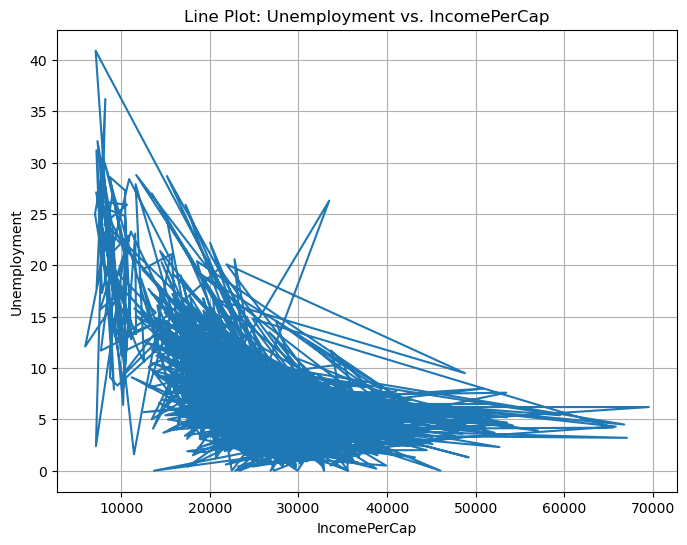

In [43]:
# Example line plot
plt.figure(figsize=(8, 6))
plt.plot(X_drop_nonnumerical['IncomePerCap'], X_drop_nonnumerical[column])
plt.title(f'Line Plot: {column} vs. IncomePerCap')
plt.xlabel('IncomePerCap')
plt.ylabel(column)
plt.grid(True)
plt.show()

In [44]:
# Group by 'State' and calculate the mean for each numerical column
df_state_avg = X_drops.groupby('State').mean().reset_index()

# Display the resulting DataFrame
df_state_avg.head()


State       TotalPop            Men          Women   Hispanic  \
0     Alabama   72399.567164   35086.656716   37312.910448   3.298507   
1      Alaska   25467.758621   13321.344828   12146.413793   5.093103   
2     Arizona  453996.400000  225670.333333  228326.066667  30.886667   
3    Arkansas   39705.920000   19488.680000   20217.240000   5.090667   
4  California  672118.051724  333906.534483  338211.517241  30.070690   

       White      Black     Native     Asian   Pacific  ...       Walk  \
0  65.168657  28.673134   0.607463  0.711940  0.017910  ...   1.204478   
1  48.420690   1.179310  31.627586  5.982759  0.544828  ...  24.696552   
2  50.826667   1.813333  13.233333  1.293333  0.126667  ...   3.320000   
3  75.634667  16.132000   0.540000  0.692000  0.077333  ...   1.970667   
4  54.762069   2.944828   1.650000  7.070690  0.291379  ...   3.336207   

   OtherTransp  WorkAtHome  MeanCommute       Employed  PrivateWork  \
0     1.140299    2.528358    26.189552   30679.238806    78.171642   
1     9.741379    5.455172    11.200000   12208.448276    59.631034   
2     2.186667    5.033333    21.700000  196926.066667    72.000000   
3     1.361333    3.250667    23.013333   17020.480000    75.233333   
4     2.603448    6.668966    25.527586  310239.913793    71.148276   

   PublicWork  SelfEmployed  FamilyWork  Unemployment  
0   16.049254      5.573134    0.210448      9.023881  
1   32.834483      7.220690    0.296552      9.655172  
2   21.846667      5.953333    0.180000      9.766667  
3   17.185333      7.376000    0.202667      7.292000  
4   18.881034      9.567241    0.405172      8.265517  

[5 rows x 35 columns]

In [45]:
X = df_state_avg.drop(['State', 'IncomePerCap', 'IncomeErr', 'IncomePerCapErr'], axis=1)
y = df_state_avg['IncomePerCap']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [48]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
dfcensus = pd.read_csv('/Users/jaseng/Documents/summer24_patina_project/patinaproject1/acs2017_census_tract_data.csv')
dfcensus.head()

In [ ]:
dfcensus.shape